In [ ]:
## Importing necessary libraries

# For scientific computation and processing array elements.
import numpy as np
from scipy.stats import norm

# Importing pandas
import pandas as pd

# For plotting statstical visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For pretty-printing tabular data
from tabulate import tabulate

# For plotting feature importance
from sklearn.feature_selection import mutual_info_classif

# For handling class imbalance
from imblearn.over_sampling import SMOTE

# For Split dataset into train and test
from sklearn.model_selection import train_test_split

# For Cross-Validation and Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# For Scaliing dataset
from sklearn.preprocessing import MinMaxScaler

# Importing algorithams for building model
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC





In [ ]:
# Evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# For plotting Decision Tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# For building Artificial Neural Networks
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

In [ ]:
# For model explainability
!pip install shap
import shap

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 12.9 MB/s eta 0:00:00


In [ ]:
df=pd.read_csv("/content/sample_data/bank-full.csv")
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

In [ ]:
df.tail()

age           job   marital  education default  balance housing loan  \
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
45206   cellular   17   nov       977         3     -1         0  unknown   
45207   cellular   17   nov       456         2     -1         0  unknown   
45208   cellular   17   nov      1127         5    184         3  success   
45209  telephone   17   nov       508         4     -1         0  unknown   
45210   cellular   17   nov       361         2    188        11    other   

      Target  
45206    yes  
45207    yes  
45208    yes  
45209     no  
45210     no

In [ ]:
df.shape

(45211, 17)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
# Bsic description of Dataset
df.describe(include='all')

age          job  marital  education default        balance  \
count   45211.000000        45211    45211      45211   45211   45211.000000   
unique           NaN           12        3          4       2            NaN   
top              NaN  blue-collar  married  secondary      no            NaN   
freq             NaN         9732    27214      23202   44396            NaN   
mean       40.936210          NaN      NaN        NaN     NaN    1362.272058   
std        10.618762          NaN      NaN        NaN     NaN    3044.765829   
min        18.000000          NaN      NaN        NaN     NaN   -8019.000000   
25%        33.000000          NaN      NaN        NaN     NaN      72.000000   
50%        39.000000          NaN      NaN        NaN     NaN     448.000000   
75%        48.000000          NaN      NaN        NaN     NaN    1428.000000   
max        95.000000          NaN      NaN        NaN     NaN  102127.000000   

       housing   loan   contact           day  month      duration  \
count    45211  45211     45211  45211.000000  45211  45211.000000   
unique       2      2         3           NaN     12           NaN   
top        yes     no  cellular           NaN    may           NaN   
freq     25130  37967     29285           NaN  13766           NaN   
mean       NaN    NaN       NaN     15.806419    NaN    258.163080   
std        NaN    NaN       NaN      8.322476    NaN    257.527812   
min        NaN    NaN       NaN      1.000000    NaN      0.000000   
25%        NaN    NaN       NaN      8.000000    NaN    103.000000   
50%        NaN    NaN       NaN     16.000000    NaN    180.000000   
75%        NaN    NaN       NaN     21.000000    NaN    319.000000   
max        NaN    NaN       NaN     31.000000    NaN   4918.000000   

            campaign         pdays      previous poutcome Target  
count   45211.000000  45211.000000  45211.000000    45211  45211  
unique           NaN           NaN           NaN        4      2  
top              NaN           NaN           NaN  unknown     no  
freq             NaN           NaN           NaN    36959  39922  
mean        2.763841     40.197828      0.580323      NaN    NaN  
std         3.098021    100.128746      2.303441      NaN    NaN  
min         1.000000     -1.000000      0.000000      NaN    NaN  
25%         1.000000     -1.000000      0.000000      NaN    NaN  
50%         2.000000     -1.000000      0.000000      NaN    NaN  
75%         3.000000     -1.000000      0.000000      NaN    NaN  
max        63.000000    871.000000    275.000000      NaN    NaN

In [ ]:
# Checking duplicated values in dataset
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


In [ ]:
# Checking for number of null values in dataset
count_null_df=pd.DataFrame({'columns':df.columns,'number_of_nulls_values':df.isna().sum()})
count_null_df.set_index('columns').sort_values(by='number_of_nulls_values', ascending = False)

number_of_nulls_values
columns                          
age                             0
day                             0
poutcome                        0
previous                        0
pdays                           0
campaign                        0
duration                        0
month                           0
contact                         0
job                             0
loan                            0
housing                         0
balance                         0
default                         0
education                       0
marital                         0
Target                          0

In [ ]:
# Finding categorical variables
categorical_variables = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical_variables)))
print('--'*45)
print(categorical_variables)

There are 10 categorical variables
------------------------------------------------------------------------------------------
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Target']


In [ ]:
# Finding numerical variables
numerical_variables=[var for var in df.columns if var not in categorical_variables]
print('There are {} numerical variables'.format(len(numerical_variables)))
print('--'*45)
print(numerical_variables)

There are 7 numerical variables
------------------------------------------------------------------------------------------
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [ ]:
# Check Unique Values and its frequency for each variable
for var in df.columns:
    print(df[var].value_counts())
    print('--'*45)

age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: count, Length: 77, dtype: int64
------------------------------------------------------------------------------------------
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
------------------------------------------------------------------------------------------
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
------------------------------------------------------------------------------------------
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
----------------------------------------------------------------------

In [ ]:
# Replacing the unknown values with null across all the dataset
df = df.replace('unknown', np.nan)

In [ ]:
# Checking for number of null values
count_null_df=pd.DataFrame({'columns':df.columns,'number_of_nulls_values':df.isna().sum(),'percentage_null_values':round(df.isna().sum()*100/len(df),2)})
count_null_df.set_index('columns').sort_values(by='percentage_null_values', ascending = False)

number_of_nulls_values  percentage_null_values
columns                                                  
poutcome                    36959                   81.75
contact                     13020                   28.80
education                    1857                    4.11
job                           288                    0.64
month                           0                    0.00
previous                        0                    0.00
pdays                           0                    0.00
campaign                        0                    0.00
duration                        0                    0.00
age                             0                    0.00
day                             0                    0.00
loan                            0                    0.00
housing                         0                    0.00
balance                         0                    0.00
default                         0                    0.00
marital                         0                    0.00
Target                          0                    0.00

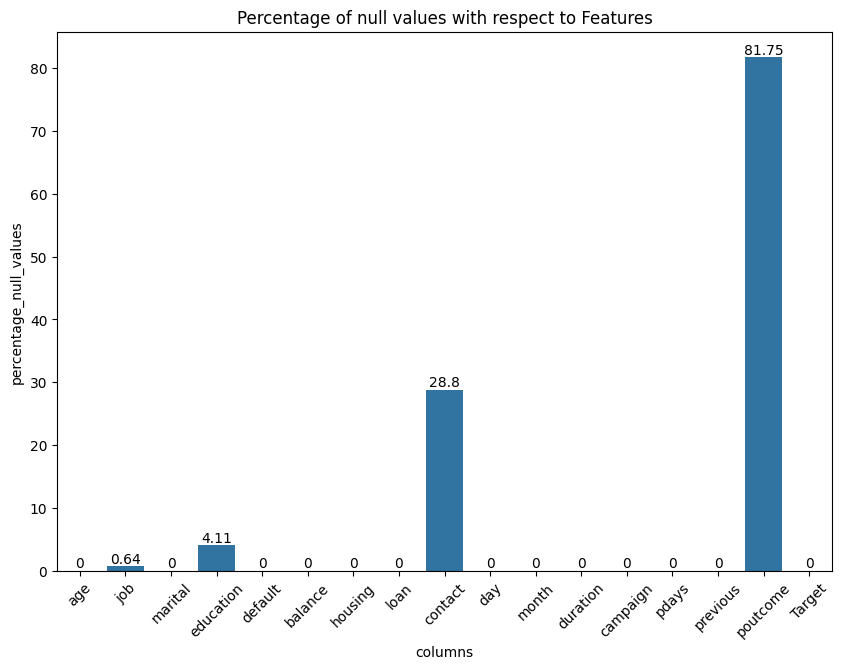

In [ ]:
# Ploting number of null values with its variable
plt.figure(figsize=(10,7))
ax=sns.barplot(x='columns', y='percentage_null_values', data=count_null_df)
ax.bar_label(ax.containers[0])
plt.title('Percentage of null values with respect to Features')
plt.xticks(rotation= 45)
plt.show()

Text(0.5, 1.0, 'Missing values in the dataset with respect to its features')

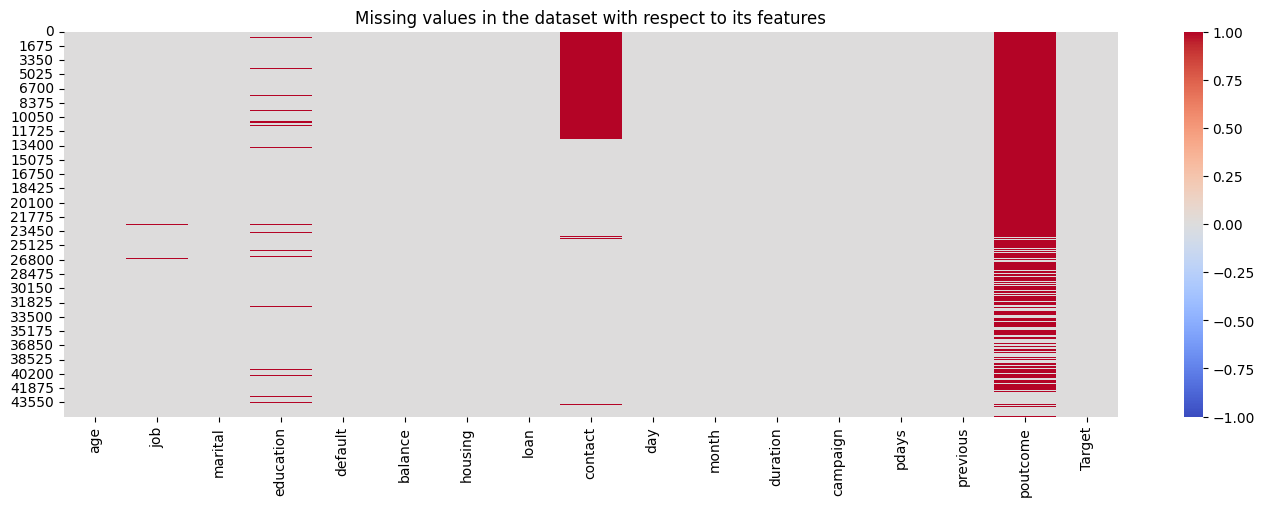

In [ ]:
# Vizualizing the null values from the dataset
plt.figure(figsize=(17,5))
sns.heatmap(df.isnull(),cbar=True,vmin=-1, cmap='coolwarm')
plt.title('Missing values in the dataset with respect to its features')

In [ ]:
#checking category of features whoes having null values

# Defining target variables
null_variables=['poutcome','contact','education','job']
# Checking categories in each target feature
for var in null_variables:
    print(df[var].value_counts())
    print('--'*45)

poutcome
failure    4901
other      1840
success    1511
Name: count, dtype: int64
------------------------------------------------------------------------------------------
contact
cellular     29285
telephone     2906
Name: count, dtype: int64
------------------------------------------------------------------------------------------
education
secondary    23202
tertiary     13301
primary       6851
Name: count, dtype: int64
------------------------------------------------------------------------------------------
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: count, dtype: int64
------------------------------------------------------------------------------------------


In [ ]:
# Dropping variables having more than 50% null values
df.drop(columns='poutcome', inplace=True)

# Replacing null values with the most frequent value in a variable
df['contact']=df['contact'].fillna(df['contact'].mode()[0])
df['education']=df['education'].fillna(df['education'].mode()[0])
df['job']=df['job'].fillna(df['job'].mode()[0])

In [ ]:
# Verify for null values are removed
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
Target       0
dtype: int64

In [ ]:
# Nullfree shape of dataset
df.shape

(45211, 16)

__________________________________________________________________________________________


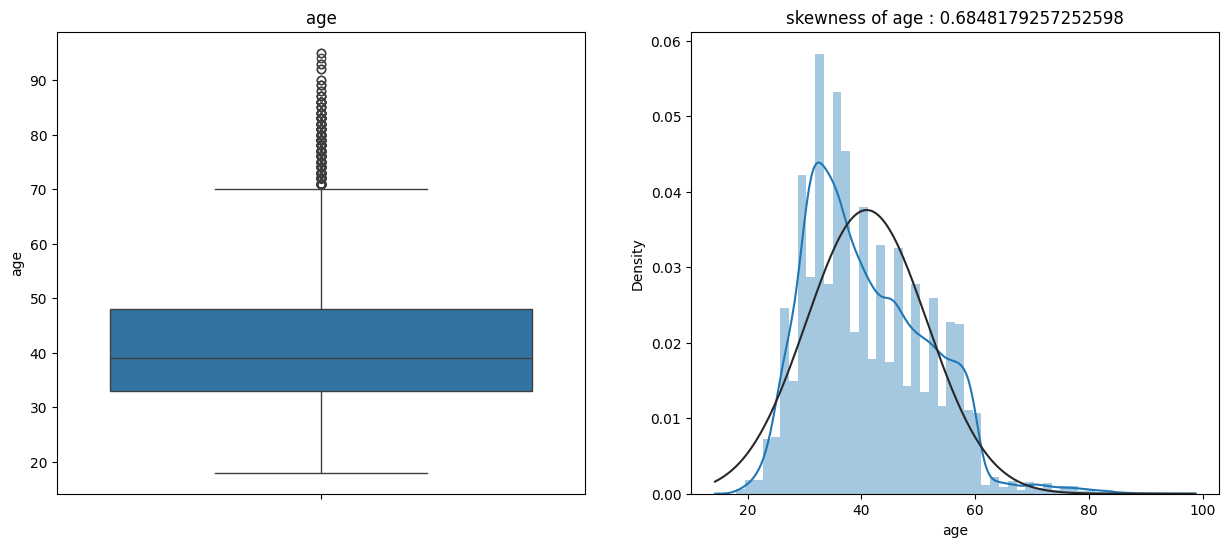

__________________________________________________________________________________________


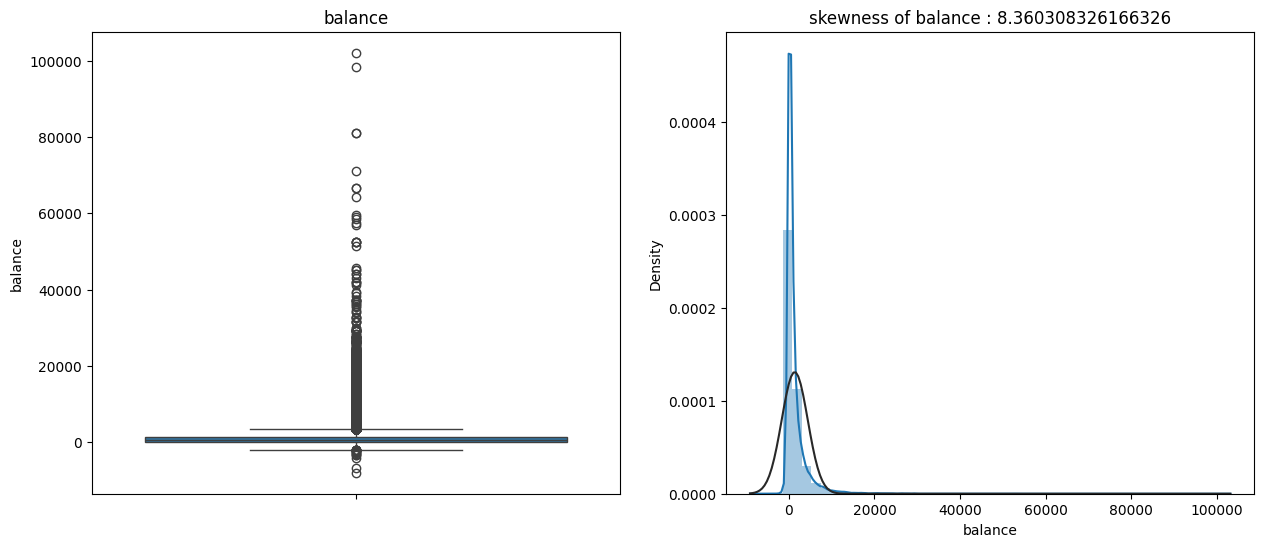

__________________________________________________________________________________________


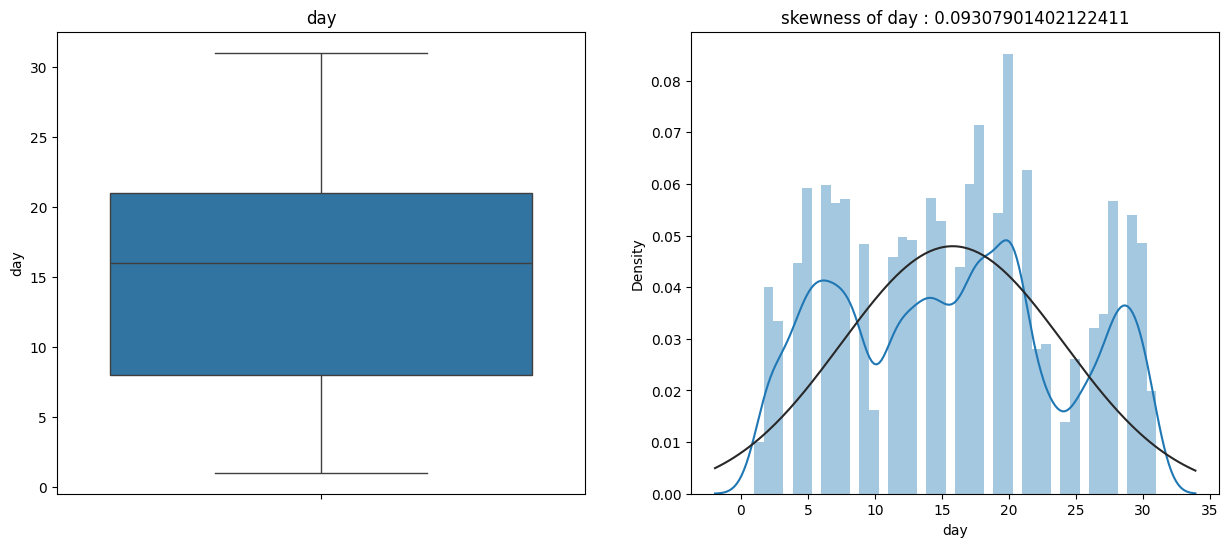

__________________________________________________________________________________________


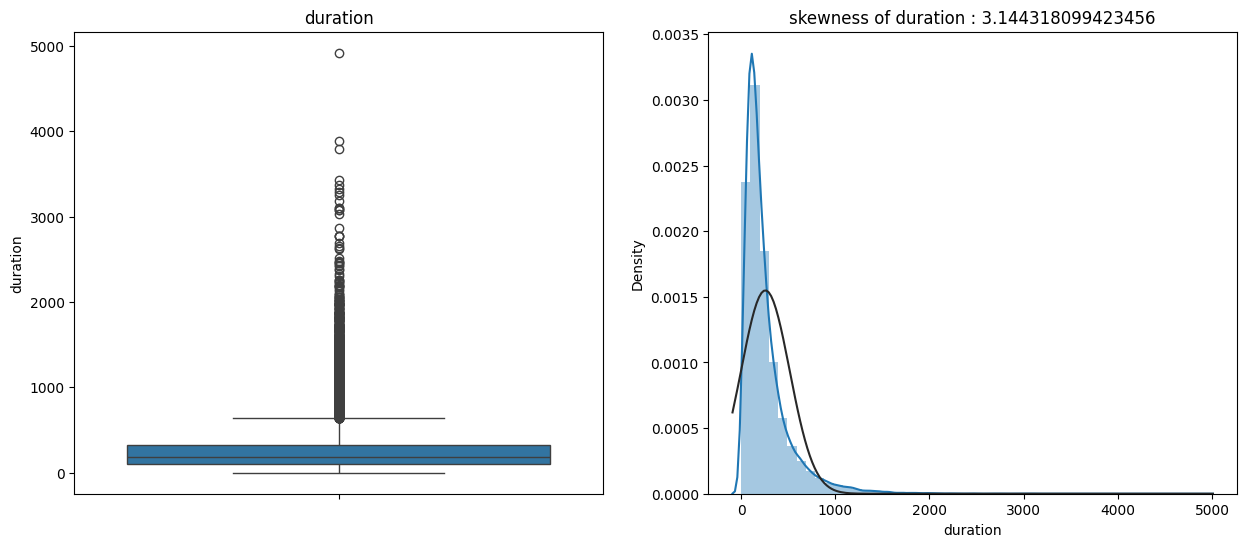

__________________________________________________________________________________________


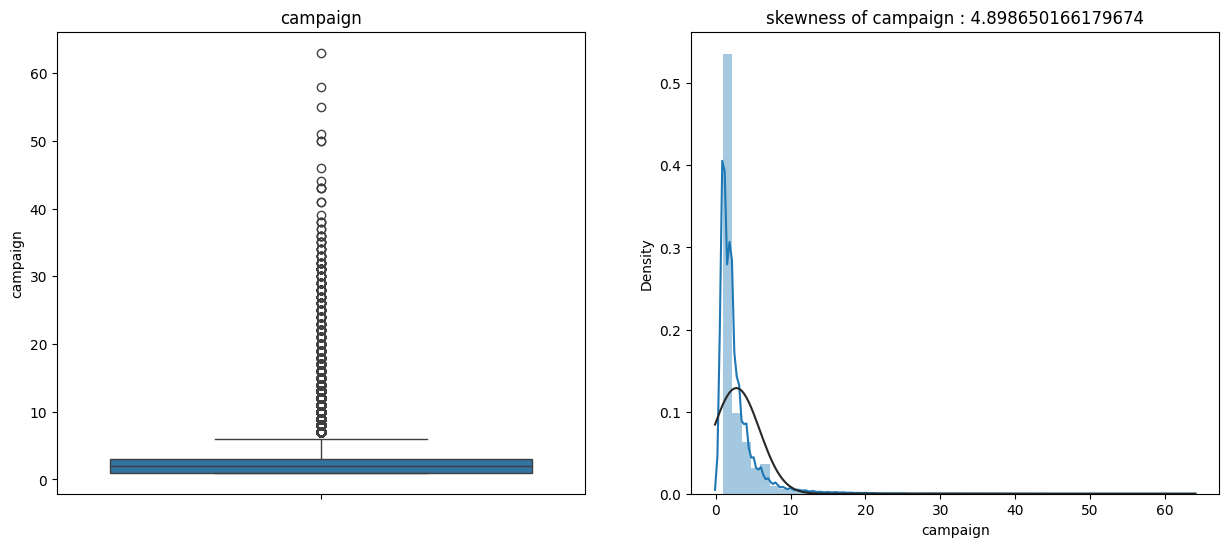

__________________________________________________________________________________________


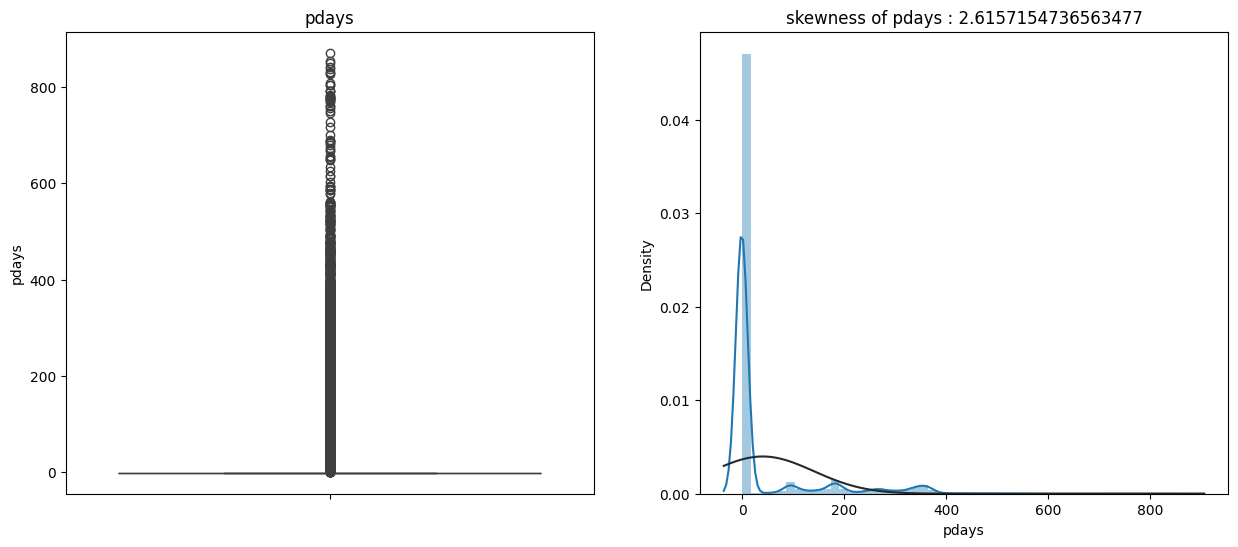

__________________________________________________________________________________________


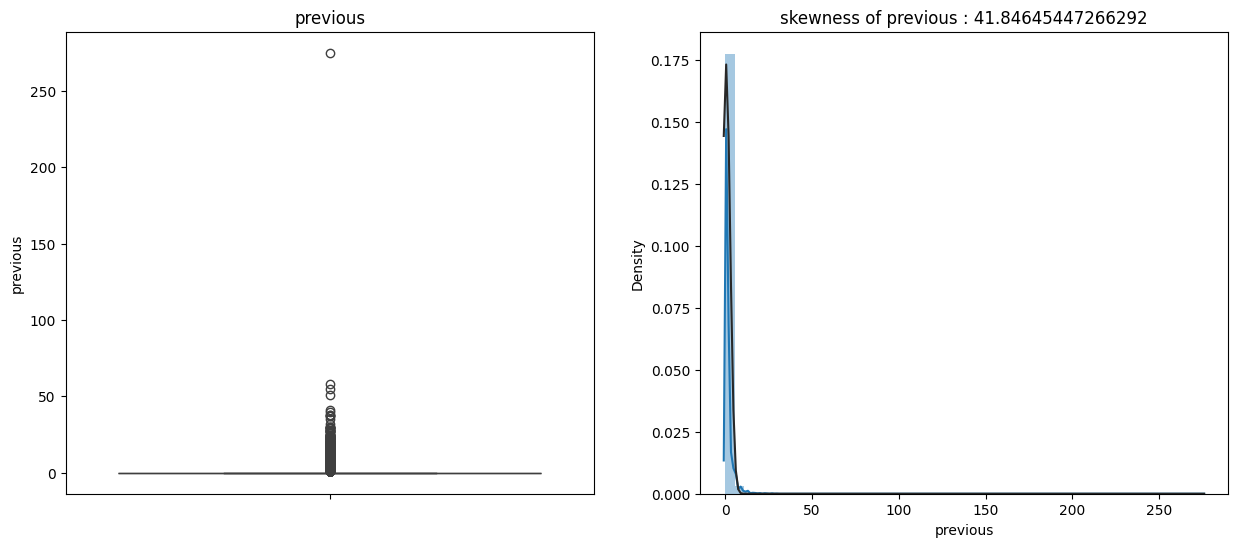

In [ ]:
# Checking for outliers in numerical variables using boxplot
from scipy.stats import norm

# Plotting Box and Distribution plot using for loop
for var in numerical_variables:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var], fit=norm)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*45)
    plt.show()

In [ ]:
# Using Inter Quartile Range for removing outliers from numerical variables

# Defining outlier features but remove flat IQR feature pdays and previous
outlier_var=['age', 'balance', 'duration', 'campaign']

# Capping dataset
for i in outlier_var:
    # Findling IQR
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1

    # Defining upper and lower limit
    lower_limit =df[i].quantile(0.25)-1.5*IQR
    upper_limit =df[i].quantile(0.75)+1.5*IQR

    # Applying lower and upper limit to each variables
    df.loc[(df[i] > upper_limit),i] = upper_limit
    df.loc[(df[i] < lower_limit),i] = lower_limit

__________________________________________________________________________________________


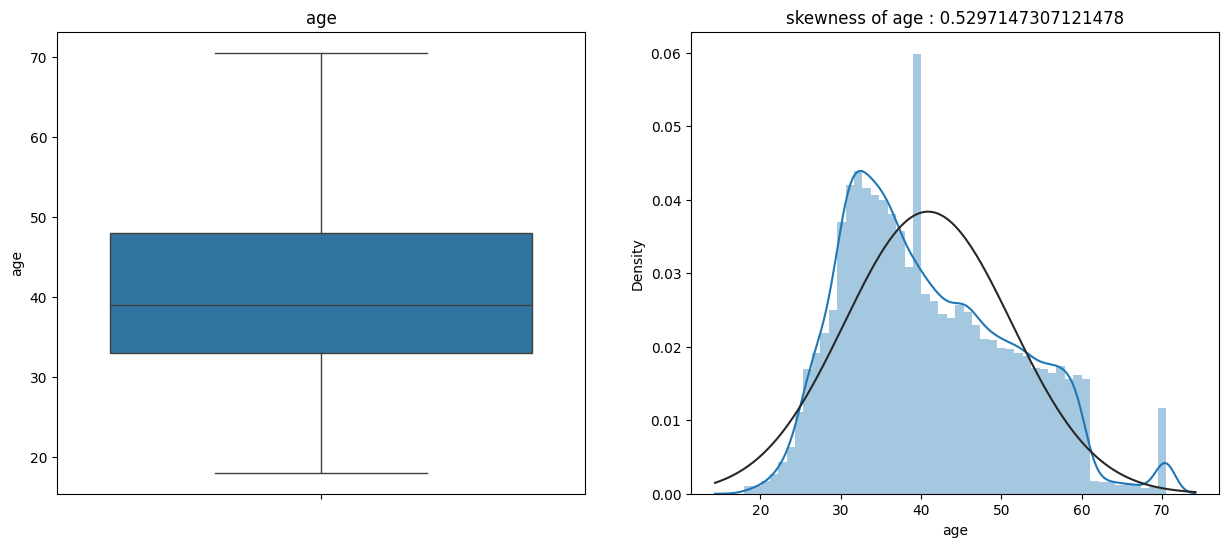

__________________________________________________________________________________________


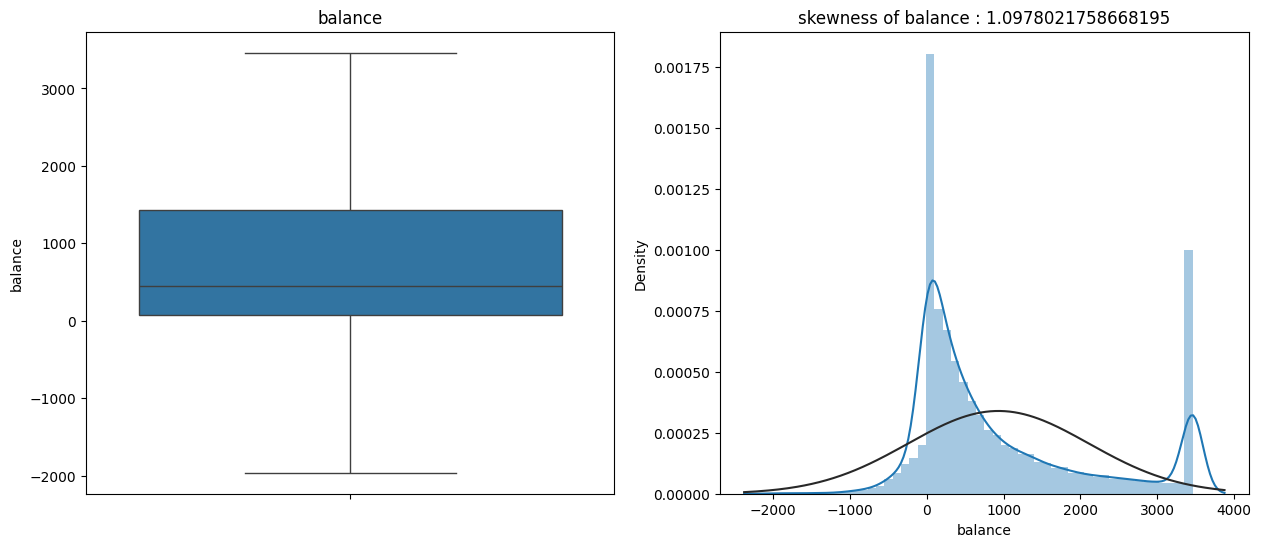

__________________________________________________________________________________________


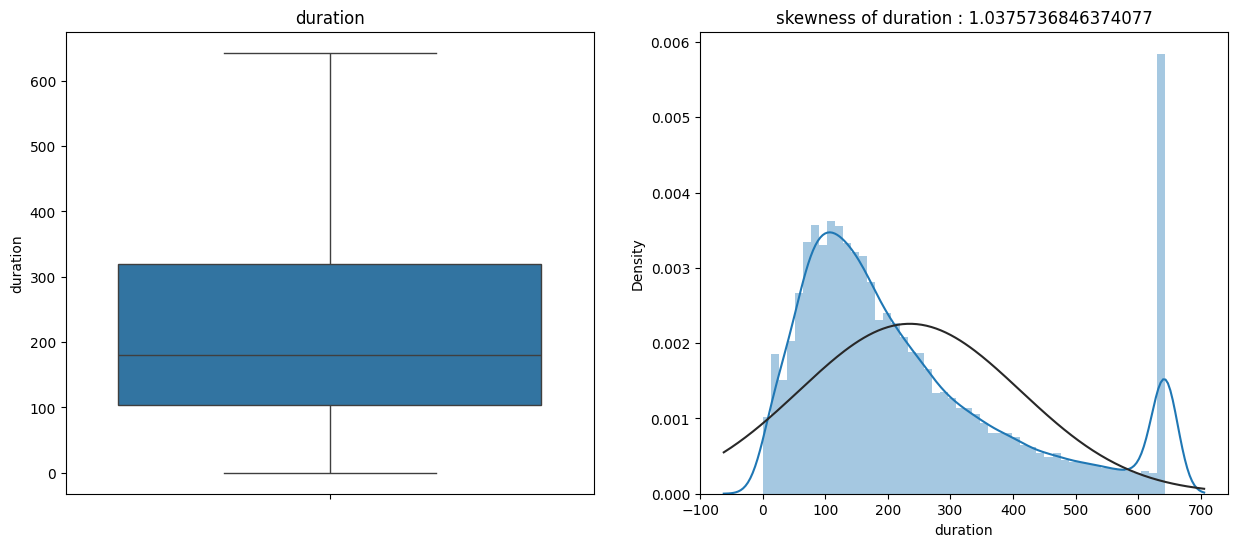

__________________________________________________________________________________________


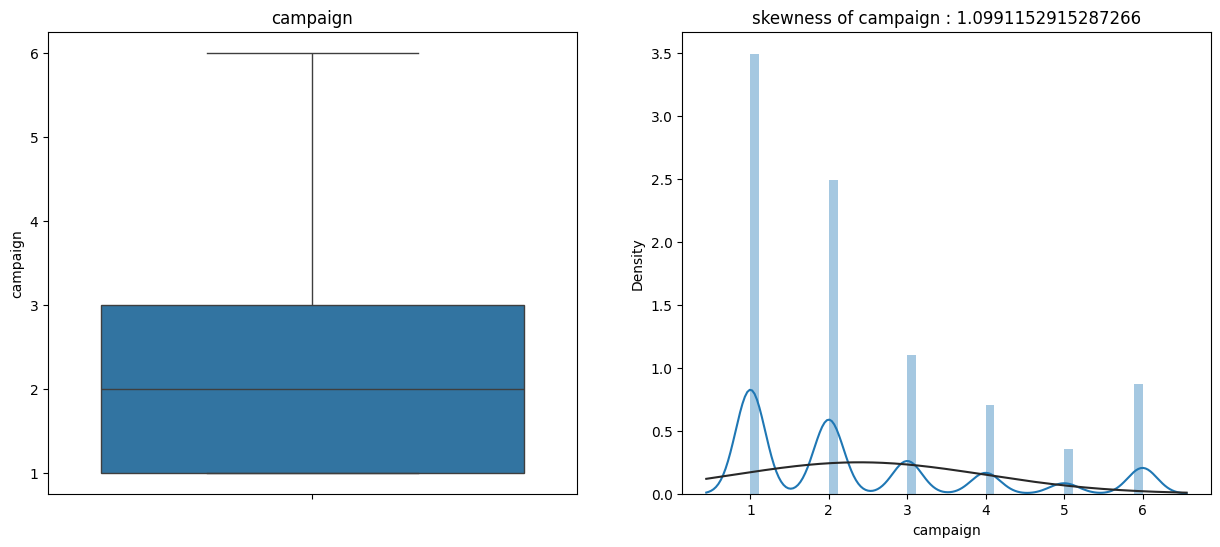

In [ ]:
# Using boxplot checking outliers in features after removed using IQR

for var in outlier_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var], fit=norm)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*45)
    plt.show()

In [ ]:
# Defining r to autofit the number and size of plots
r = int(len(df.columns))

In [ ]:
# Defining a function to Notate the percent count of each value on the bars

def annot_percent(axes):
    '''Takes axes as input and labels the percent count of each bar in a countplot'''
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')



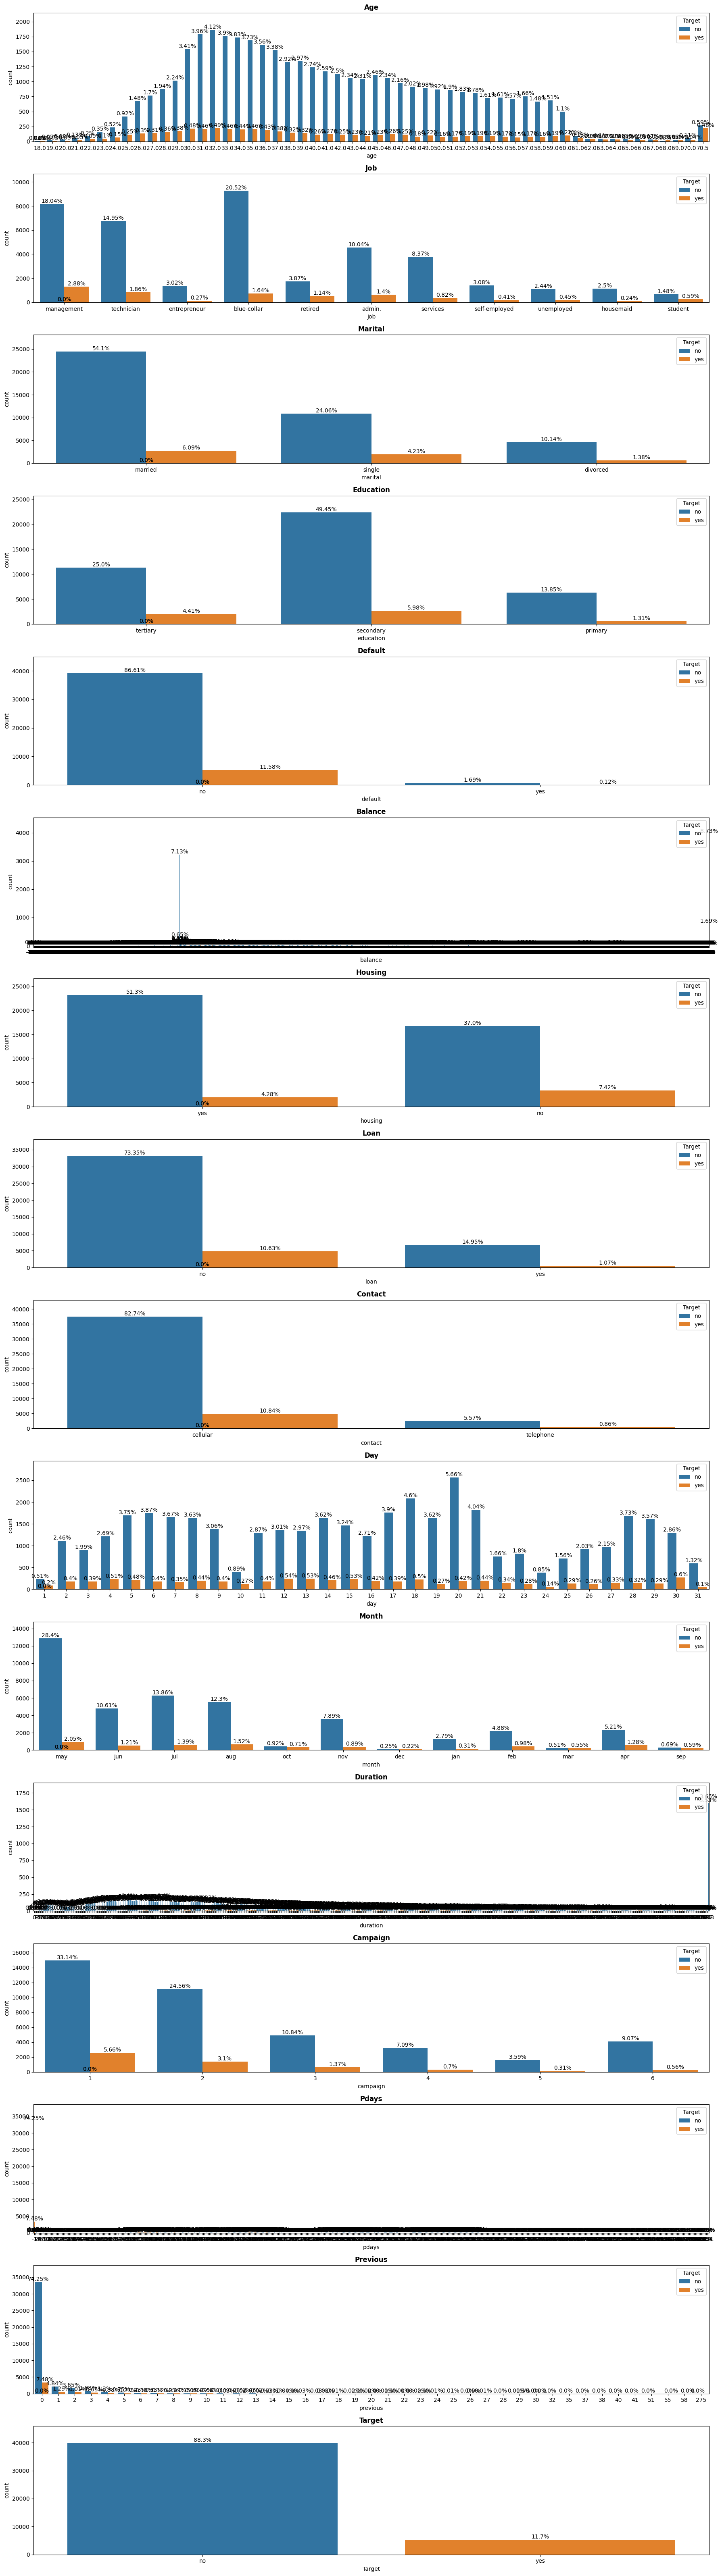

In [ ]:
# Plotting the countplots for each variable in target_variables
y = 'Target'
plt.figure(figsize=(18,r*4))
for n,var in enumerate(df.columns):
    plot = plt.subplot(r,1,n+1)
    sns.countplot(x=df[var], hue=df[y]).margins(y=0.15)
    plt.title(f'{var.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)

<Axes: title={'center': 'Number of clients who subscribed bank term deposit as per their job and education'}, xlabel='job,education,Target'>

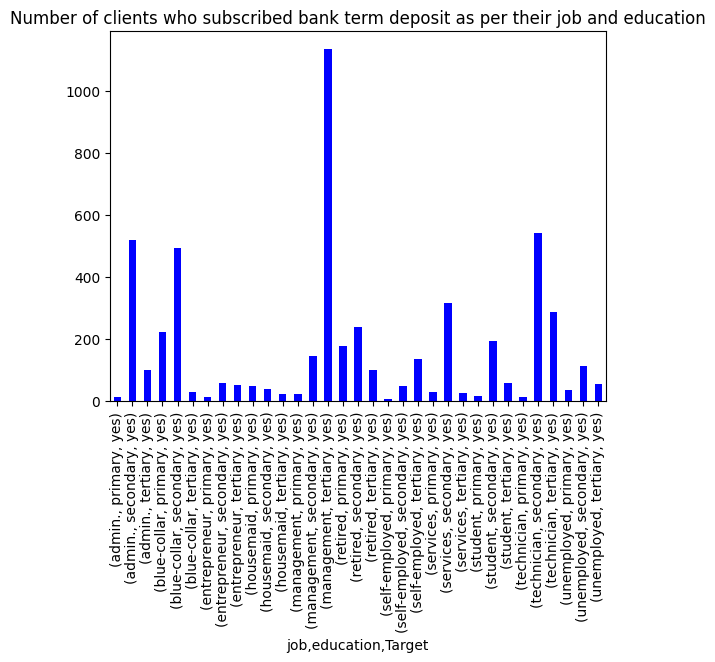

In [ ]:
# Plotting a count plot to vizualize the number of customers according to their jobs and lvel of education by using group by operation

# Dataset having only subscribed Bank term deposit with job and education
subscribed_df = df[df['Target']=='yes'] # Changed df.y to df['Target']
subscribed_df2=subscribed_df.groupby(['job','education','Target'])['Target'].count() # Changed df.y to df['Target']

# Plotting bar plot for subscribed Bank term deposit with job and education
subscribed_df2.plot(kind="bar",title = 'Number of clients who subscribed bank term deposit as per their job and education', color="blue")

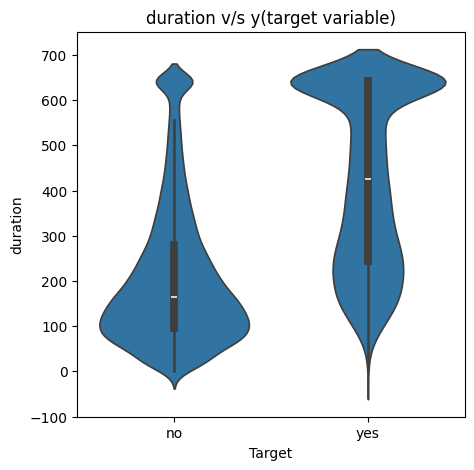

In [ ]:
# Plotting box plot for checking the spread of duration in seconds for the target variable(yes or no)
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
ax=sns.violinplot(x=df['Target'], y=df['duration'])
ax.set_title('duration v/s y(target variable)')
annot_percent(plot)
plt.show()

<Axes: title={'center': 'Number of clients who subscribed bank term deposit as per their housing loan and personal loan'}, ylabel='loan,housing'>

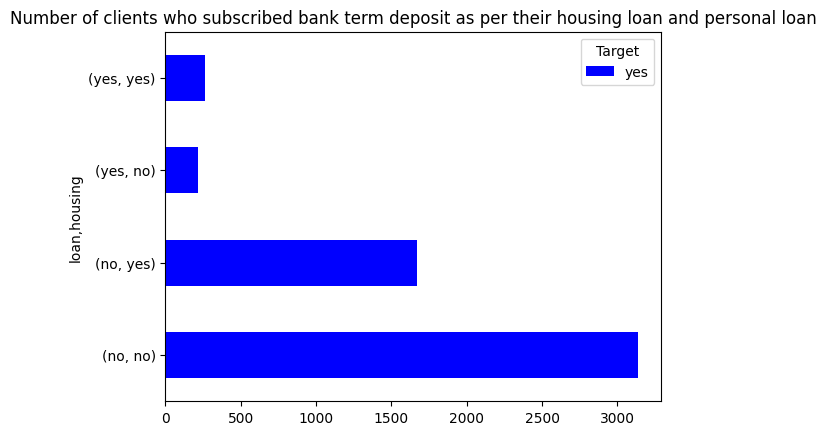

In [ ]:
# Plotting bar graph to vizualize the count of clients who have opted for a term deposit given their housing loan and personal loan

# Dataset having only subscribed Bank term deposit with housing loan and personal loan
df_loan_yes = df[df['Target']=='yes']
df_loan_yes2=df_loan_yes.groupby(['loan','housing','Target'])['Target'].count().unstack()

# Plotting bar plot for subscribed Bank term deposit with housing loan and personal loan
df_loan_yes2.plot(kind="barh",title = 'Number of clients who subscribed bank term deposit as per their housing loan and personal loan', color="blue")

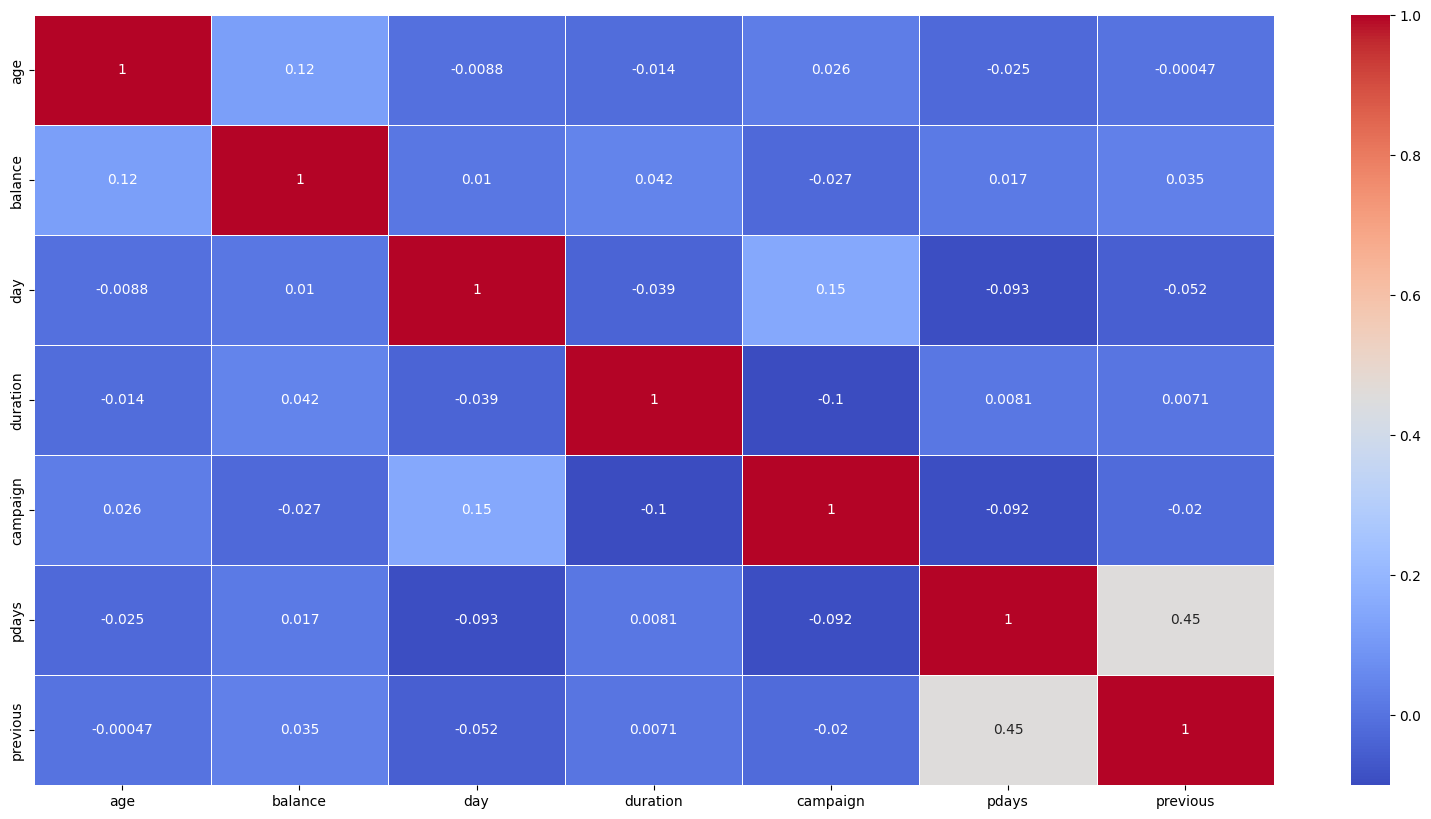

In [ ]:
# Examining the heatmap and correlation matrix to determine the relationship between the variables
f, ax = plt.subplots(figsize = (20, 10))

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(),ax = ax, annot=True, cmap='coolwarm', linewidths=0.5)

plt.show()

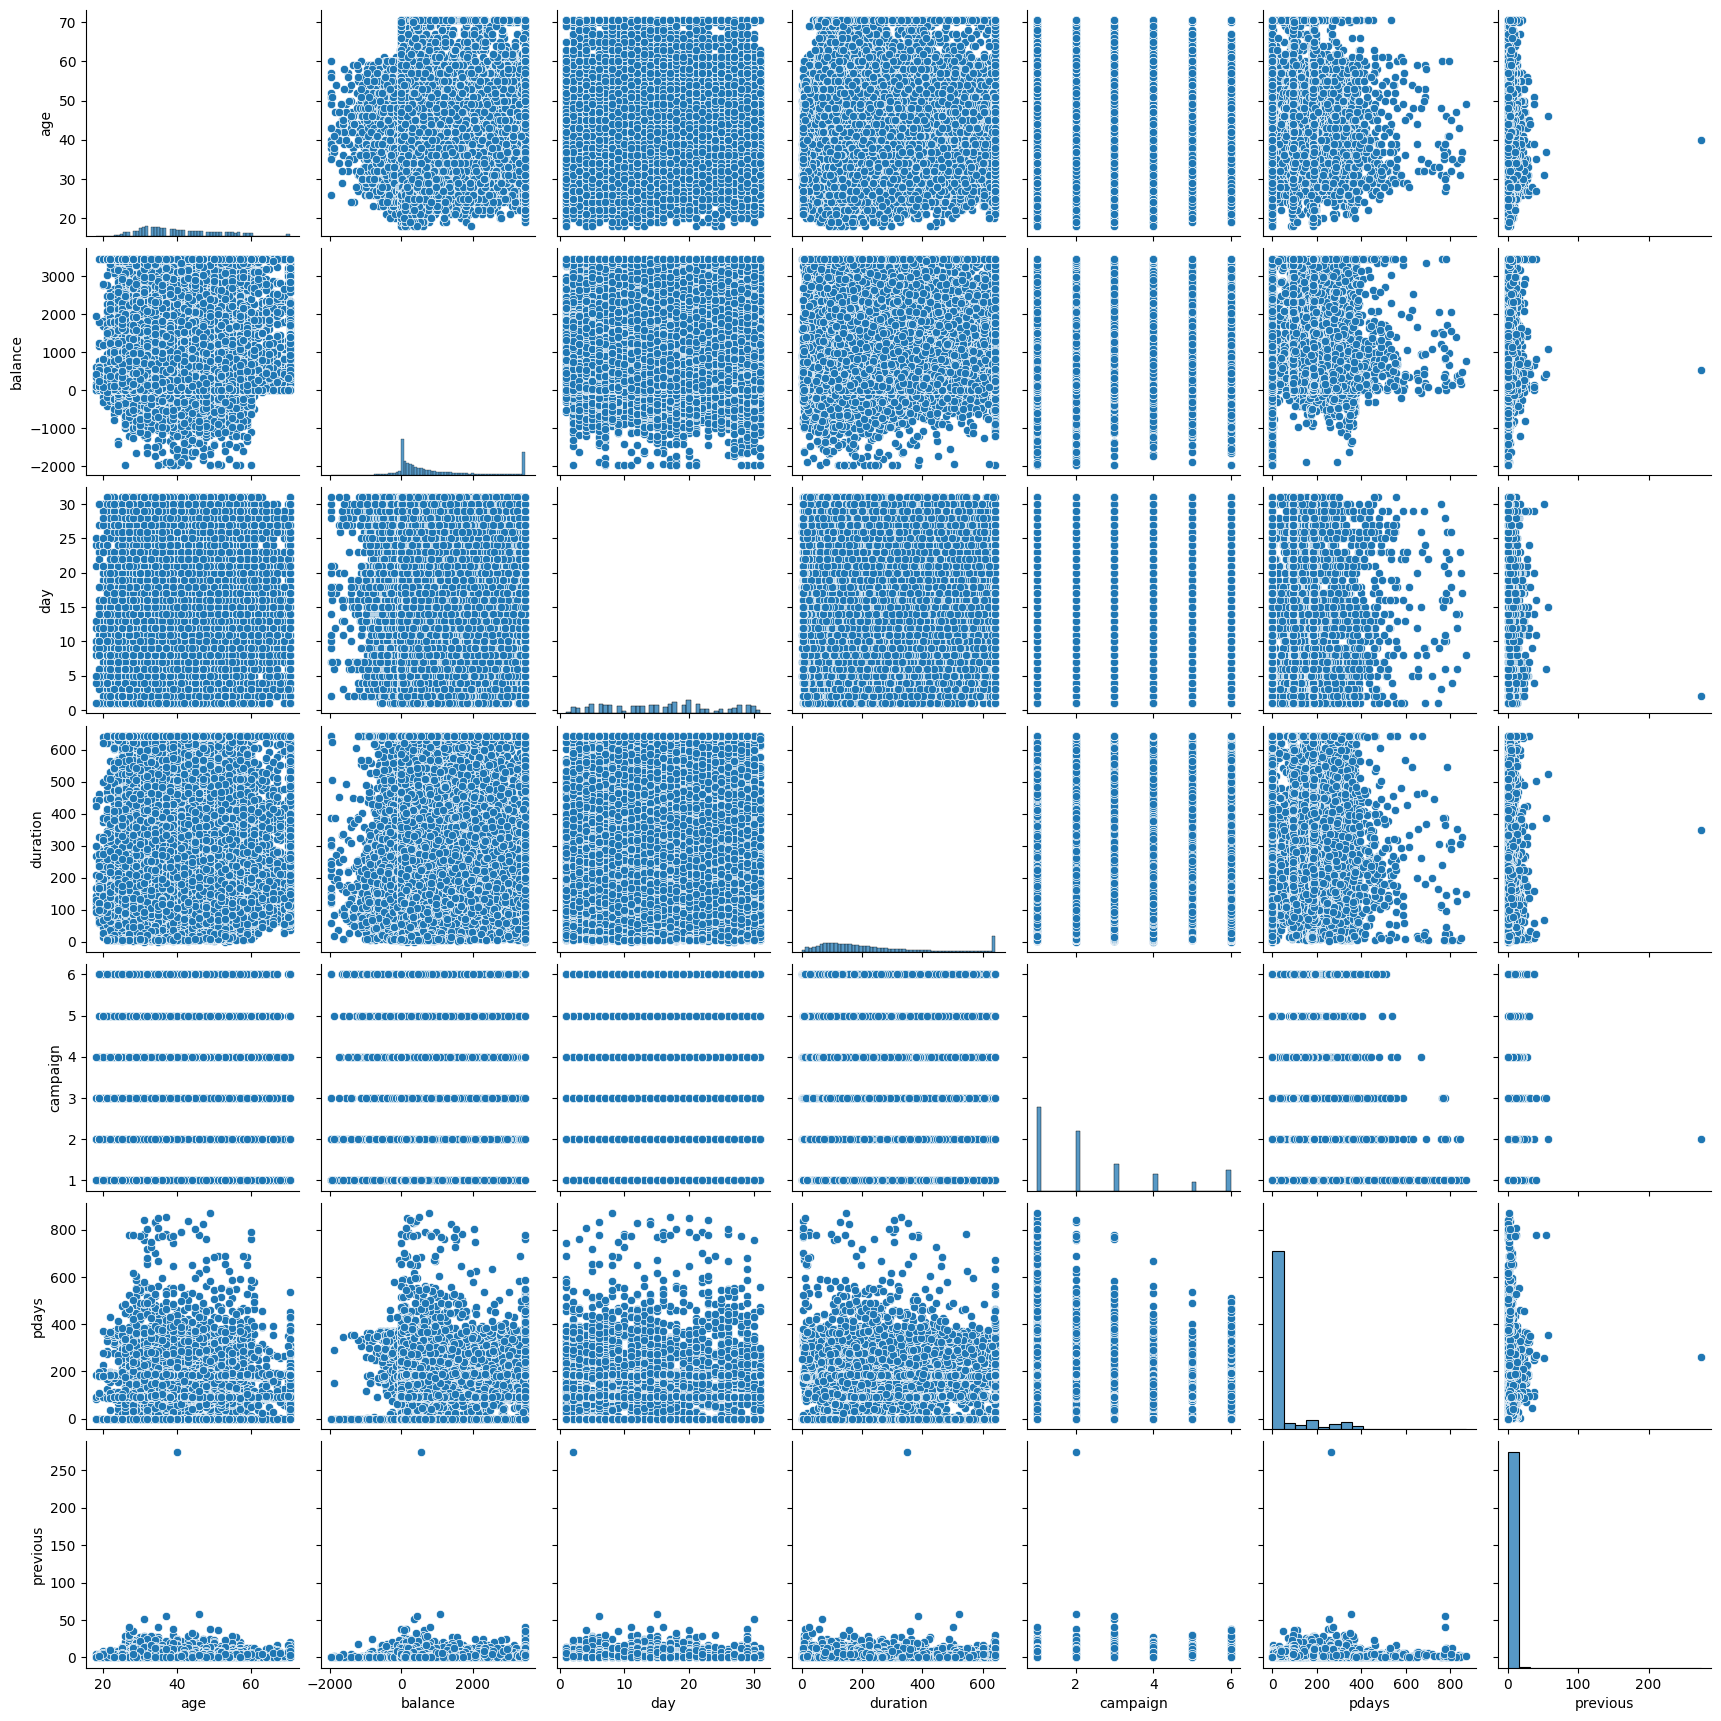

In [ ]:
# Pair Plot visualization code
sns.pairplot(df, palette="husl")
plt.show()

In [ ]:
# Checking basic info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  float64
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  Target     45211 non-null  object 
dtypes: float64(1), int64(6), object(9)
memory usage: 5.5+ MB


In [ ]:
# Addressing categorical variables from the dataset
categorical_variables=df.describe(include=['object']).columns
print(f'Categorical variables are : {list(categorical_variables)}')

Categorical variables are : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'Target']


In [ ]:
# Checking categories in each categorical features
for var in categorical_variables:
    print(df[var].value_counts())
    print('__'*45)

job
blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: count, dtype: int64
__________________________________________________________________________________________
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
__________________________________________________________________________________________
education
secondary    25059
tertiary     13301
primary       6851
Name: count, dtype: int64
__________________________________________________________________________________________
default
no     44396
yes      815
Name: count, dtype: int64
__________________________________________________________________________________________
housing
yes    25130
no     20081
Name: count, dtype: int64
____________________________________________________

In [ ]:
## label encoding

# Mapping the categorical variables whoes having limited categories
df['marital'] = df['marital'].map({'single':0,'married':1,'divorced':2})
df['education'] = df['education'].map({'secondary':0,'tertiary':1, 'primary':2})
df['default'] = df['default'].map({'yes':1,'no':0})
df['housing'] = df['housing'].map({'yes':1,'no':0})
df['loan'] = df['loan'].map({'yes':1,'no':0})
df['contact'] = df['contact'].map({'cellular':1,'telephone':0})
df['Target'] = df['Target'].map({'yes':1,'no':0})

In [ ]:
## One hot encoding for variable job and month
df=pd.get_dummies(df, columns=['job', "month"], prefix=["job", "month"], drop_first=True)

# Checking basic information of dataset after feature encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                45211 non-null  float64
 1   marital            45211 non-null  int64  
 2   education          45211 non-null  int64  
 3   default            45211 non-null  int64  
 4   balance            45211 non-null  int64  
 5   housing            45211 non-null  int64  
 6   loan               45211 non-null  int64  
 7   contact            45211 non-null  int64  
 8   day                45211 non-null  int64  
 9   duration           45211 non-null  int64  
 10  campaign           45211 non-null  int64  
 11  pdays              45211 non-null  int64  
 12  previous           45211 non-null  int64  
 13  Target             45211 non-null  int64  
 14  job_blue-collar    45211 non-null  bool   
 15  job_entrepreneur   45211 non-null  bool   
 16  job_housemaid      452

In [ ]:
# Final Dataset
pd.set_option('display.max_columns', None)
df.head()

age  marital  education  default  balance  housing  loan  contact  day  \
0  58.0        1          1        0     2143        1     0        1    5   
1  44.0        0          0        0       29        1     0        1    5   
2  33.0        1          0        0        2        1     1        1    5   
3  47.0        1          0        0     1506        1     0        1    5   
4  33.0        0          0        0        1        0     0        1    5   

   duration  campaign  pdays  previous  Target  job_blue-collar  \
0       261         1     -1         0       0            False   
1       151         1     -1         0       0            False   
2        76         1     -1         0       0            False   
3        92         1     -1         0       0             True   
4       198         1     -1         0       0             True   

   job_entrepreneur  job_housemaid  job_management  job_retired  \
0             False          False            True        False   
1             False          False           False        False   
2              True          False           False        False   
3             False          False           False        False   
4             False          False           False        False   

   job_self-employed  job_services  job_student  job_technician  \
0              False         False        False           False   
1              False         False        False            True   
2              False         False        False           False   
3              False         False        False           False   
4              False         False        False           False   

   job_unemployed  month_aug  month_dec  month_feb  month_jan  month_jul  \
0           False      False      False      False      False      False   
1           False      False      False      False      False      False   
2           False      False      False      False      False      False   
3           False      False      False      False      False      False   
4           False      False      False      False      False      False   

   month_jun  month_mar  month_may  month_nov  month_oct  month_sep  
0      False      False       True      False      False      False  
1      False      False       True      False      False      False  
2      False      False       True      False      False      False  
3      False      False       True      False      False      False  
4      False      False       True      False      False      False

In [ ]:
## Separating independant variables and dependant variable

# Creating the dataset with all dependent variables
dependent_variable = 'Target'

# Creating the dataset with all independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})

# Create the data of independent variables
X = df[independent_variables].copy()
# Create the data of dependent variable
y = df[dependent_variable].copy()

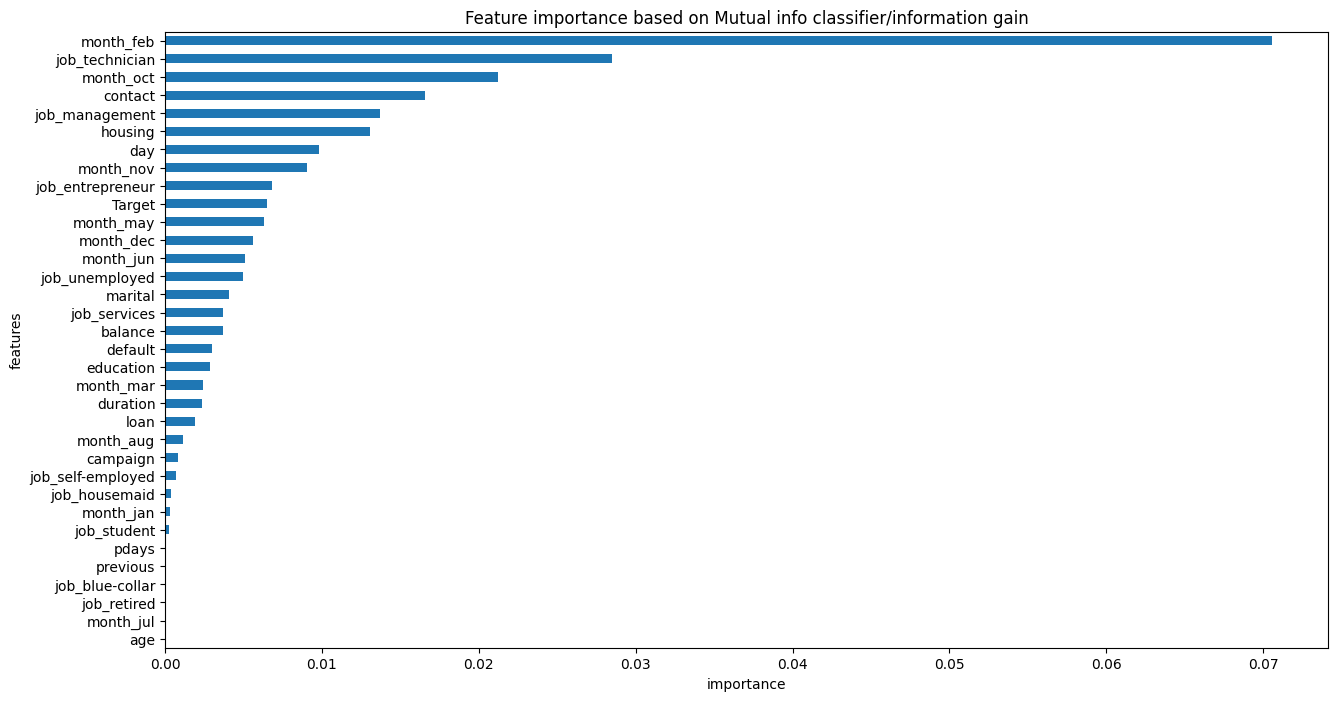

In [ ]:
# Plotting feature importance for better selection to avoid overfitting

from sklearn.feature_selection import mutual_info_classif
importance = mutual_info_classif(X,y)
feature_importances = pd.Series(importance,df.columns[0:len(df.columns[0:34])]).sort_values(ascending=True)
plt.figure(figsize=(15,8))
feature_importances.plot(kind='barh')
plt.title("Feature importance based on Mutual info classifier/information gain")
plt.xlabel('importance')
plt.ylabel('features')
plt.show()

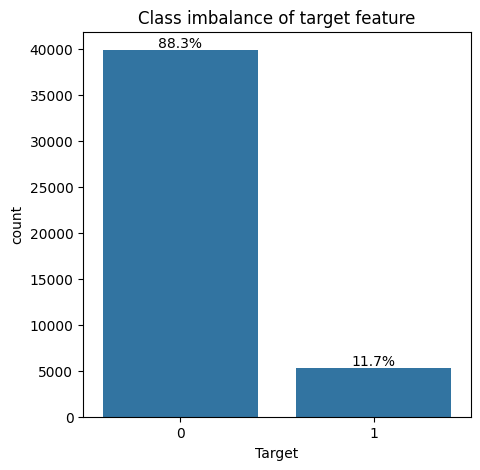

In [ ]:
# Plotting bar graph to vizualize the class imbalance of target feature
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
sns.countplot(x=df['Target'])
plt.title('Class imbalance of target feature')
annot_percent(plot)
plt.show()

In [ ]:
# Import model imblearn in envirnoment
!pip install imblearn

# Using Synthetic Minority Oversampling Technique (SMOTE) for handling class imbalance

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X,y)

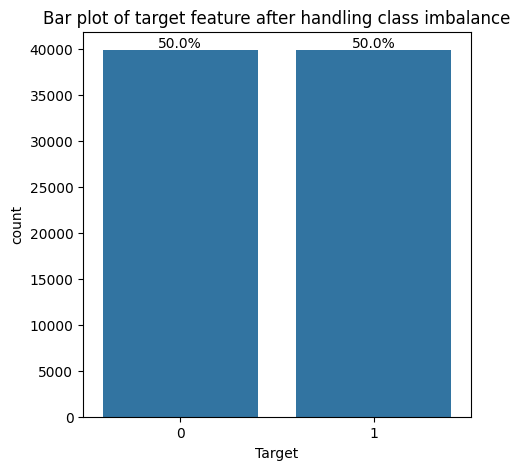

In [ ]:
# Plotting bar graph to vizualize the class imbalance of target feature
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
sns.countplot(x=y_smote)
plt.title('Bar plot of target feature after handling class imbalance')
annot_percent(plot)
plt.show()

In [ ]:
# Data Spliting

In [ ]:
# Splitting dataset into training set and test set
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test= train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

In [ ]:
# Checking shape of split
print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of X_train : (63875, 34)
Shape of X_test : (15969, 34)
Shape of y_train : (63875,)
Shape of y_test : (15969,)


In [ ]:
# Checking values of splitted dataset
X_train[0:3]

month_aug  loan  default  job_retired  job_blue-collar  previous  \
76180      False     0        0         True            False         3   
36038      False     1        0         True            False         0   
41791      False     0        0        False            False         0   

       month_dec  housing  contact  job_management  month_feb  month_nov  \
76180      False        0        1            True       True      False   
36038      False        1        1           False      False      False   
41791      False        0        1            True      False      False   

       month_jul  campaign  month_jun  education  job_unemployed        age  \
76180      False         1      False          1           False  70.028256   
36038      False         1      False          1           False  50.000000   
41791      False         3      False          1           False  62.000000   

       job_housemaid  job_entrepreneur  month_mar  job_self-employed  pdays  \
76180          False             False      False              False     86   
36038          False             False      False              False     -1   
41791          False             False      False              False     -1   

       day  job_student  month_oct  duration  job_technician  month_jan  \
76180   10        False      False       310           False      False   
36038   11        False      False        67           False      False   
41791   13        False       True        78           False      False   

       marital  job_services  month_sep  month_may  balance  
76180        1         False      False      False     3324  
36038        1         False      False       True        4  
41791        1         False      False      False        0

In [ ]:
# Checking values of splitted dataset
X_test[0:3]

month_aug  loan  default  job_retired  job_blue-collar  previous  \
72809      False     0        0        False            False         0   
71061      False     0        0        False            False         0   
57176       True     0        0         True            False         0   

       month_dec  housing  contact  job_management  month_feb  month_nov  \
72809       True        0        1           False      False      False   
71061      False        1        1           False      False       True   
57176      False        0        0           False       True      False   

       month_jul  campaign  month_jun  education  job_unemployed        age  \
72809      False         2      False          0            True  39.273337   
71061       True         2      False          0           False  46.690791   
57176      False         2      False          0           False  54.030217   

       job_housemaid  job_entrepreneur  month_mar  job_self-employed  pdays  \
72809          False             False      False              False     -1   
71061          False             False      False              False     -1   
57176          False             False      False              False     -1   

       day  job_student  month_oct  duration  job_technician  month_jan  \
72809   17        False      False       315            True      False   
71061   22        False      False       643            True      False   
57176    4        False      False       643            True      False   

       marital  job_services  month_sep  month_may  balance  
72809        1         False      False      False     3462  
71061        0         False      False      False     1100  
57176        1         False      False      False        0

#Data Scaling

In [ ]:
# Transforming data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Checking values of splitted dataset after normalisation
X_train[0:5]

array([[0.        , 0.        , 0.        , 1.        , 0.        ,
        0.05263158, 0.        , 0.        , 1.        , 1.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.5       , 0.        , 0.9910144 , 0.        , 0.        ,
        0.        , 0.        , 0.09977064, 0.3       , 0.        ,
        0.        , 0.48211509, 0.        , 0.        , 0.5       ,
        0.        , 0.        , 0.        , 0.97455752],
       [0.        , 1.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5       , 0.        , 0.60952381, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.33333333, 0.        ,
        0.        , 0.10419907, 0.        , 0.        , 0.5       ,
        0.        , 0.        , 1.        , 0.36246313],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
  

In [ ]:
# Checking values of splitted dataset after normalisation
X_train[0:5]

array([[0.        , 0.        , 0.        , 1.        , 0.        ,
        0.05263158, 0.        , 0.        , 1.        , 1.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.5       , 0.        , 0.9910144 , 0.        , 0.        ,
        0.        , 0.        , 0.09977064, 0.3       , 0.        ,
        0.        , 0.48211509, 0.        , 0.        , 0.5       ,
        0.        , 0.        , 0.        , 0.97455752],
       [0.        , 1.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5       , 0.        , 0.60952381, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.33333333, 0.        ,
        0.        , 0.10419907, 0.        , 0.        , 0.5       ,
        0.        , 0.        , 1.        , 0.36246313],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
  

#Model Implementation

In [ ]:
# Defining function which fit classification algoritham, evaluate and visualise model using train test split

# Import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# Defining function
def classification_model(X_train, X_test, y_train, y_test, clf):
    """
    function fit the algorithm on the training set, evaluate the model, and visualise evaluation metrics
    """
    ## Fit the model using training dataset
    model=clf.fit(X_train, y_train)
    print(model)
    print('=='*45)

    ## Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ## Evaluate the model
    print('Training set evaluation result :\n')
    cm_train = confusion_matrix(y_train, y_train_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    roc_auc_score_train=roc_auc_score(y_train, y_train_pred)
    print("Confusion Matrix: \n", cm_train)
    print("Accuracy: ", accuracy_train)
    print("Precision: ", precision_train)
    print("Recall: ", recall_train)
    print("F1 Score: ", f1_train)
    print("roc_auc_score: ", roc_auc_score_train)
    print('\n-------------------------------\n')
    print('Test set evaluation result :\n')
    cm_test = confusion_matrix(y_test, y_test_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    roc_auc_score_test=roc_auc_score(y_test, y_test_pred)
    print("Confusion Matrix: \n", cm_test)
    print("Accuracy: ", accuracy_test)
    print("Precision: ", precision_test)
    print("Recall: ", recall_test)
    print("F1 Score: ", f1_test)
    print("roc_auc_score: ", roc_auc_score_test)
    print('=='*45)

    ## Visualizes evaluation metrics
    fig,axes = plt.subplots(nrows=2, ncols=2)
    ax1 = sns.heatmap(cm_train, annot=True, ax=axes[0,0], fmt='d')
    ax1.set_title('Confusion Matrix for training set')
    ax1.set_ylabel('True label')
    ax1.set_xlabel('Predicted label')
    ax2 = sns.heatmap(cm_test, annot=True, ax=axes[0,1], fmt='d')
    ax2.set_title('Confusion Matrix for test set')
    ax2.set_ylabel('True label')
    ax2.set_xlabel('Predicted label')
    ax3 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_train, precision_train, recall_train, f1_train, roc_auc_score_train], ax=axes[1,0])
    ax3.set_title('Evaluation Metrics for training set')
    ax3.tick_params(axis='x', rotation=90)
    ax4 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_test, precision_test, recall_test, f1_test, roc_auc_score_test], ax=axes[1,1])
    ax4.set_title('Evaluation Metrics for test set')
    ax4.tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()
    print('=='*45)

    return {'model': model, 'y_train_pred': y_train_pred, 'y_test_pred': y_test_pred, 'cm_test': cm_test, 'accuracy_test': accuracy_test,
            'precision_test': precision_test, 'recall_test': recall_test, 'f1_test': f1_test, 'roc_auc_score_test': roc_auc_score_test}

In [ ]:
# Import necessary dependancy
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV

# Defining function
def classification_CV_model(X_train, X_test, y_train, y_test, clf, param_grid):
    """
    function fit the algorithm using GridSearchCV on the training set, evaluate the model, and visualise evaluation metrics
    """
    ## Fit the model on training dataset
    classifier = clf
    model = GridSearchCV(classifier, param_grid, verbose=1, scoring='accuracy', cv=3, n_jobs=-1)
    model.fit(X_train, y_train)
    print(model)
    print('=='*45)

    # Print the best parameters and score
    print("Best parameters:", model.best_params_)
    print("Best score:", model.best_score_)
    print('=='*45)

    ## Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ## Evaluate the model
    print('Training set evaluation result :\n')
    cm_train = confusion_matrix(y_train, y_train_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    roc_auc_score_train=roc_auc_score(y_train, y_train_pred)
    print("Confusion Matrix: \n", cm_train)
    print("Accuracy: ", accuracy_train)
    print("Precision: ", precision_train)
    print("Recall: ", recall_train)
    print("F1 Score: ", f1_train)
    print("roc_auc_score: ", roc_auc_score_train)
    print('\n-------------------------------\n')
    print('Test set evaluation result :\n')
    cm_test = confusion_matrix(y_test, y_test_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    roc_auc_score_test=roc_auc_score(y_test, y_test_pred)
    print("Confusion Matrix: \n", cm_test)
    print("Accuracy: ", accuracy_test)
    print("Precision: ", precision_test)
    print("Recall: ", recall_test)
    print("F1 Score: ", f1_test)
    print("roc_auc_score: ", roc_auc_score_test)
    print('=='*45)

    ## Visualizes evaluation metrics
    fig,axes = plt.subplots(nrows=2, ncols=2)
    ax1 = sns.heatmap(cm_train, annot=True, ax=axes[0,0], fmt='d')
    ax1.set_title('Confusion Matrix for training set')
    ax1.set_ylabel('True label')
    ax1.set_xlabel('Predicted label')
    ax2 = sns.heatmap(cm_test, annot=True, ax=axes[0,1], fmt='d')
    ax2.set_title('Confusion Matrix for test set')
    ax2.set_ylabel('True label')
    ax2.set_xlabel('Predicted label')
    ax3 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_train, precision_train, recall_train, f1_train, roc_auc_score_train], ax=axes[1,0])
    ax3.set_title('Evaluation Metrics for training set')
    ax3.tick_params(axis='x', rotation=90)
    ax4 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_test, precision_test, recall_test, f1_test, roc_auc_score_test], ax=axes[1,1])
    ax4.set_title('Evaluation Metrics for test set')
    ax4.tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()
    print('=='*45)

    return {'model': model, 'y_train_pred': y_train_pred, 'y_test_pred': y_test_pred, 'cm_test': cm_test, 'accuracy_test': accuracy_test,
            'precision_test': precision_test, 'recall_test': recall_test, 'f1_test': f1_test, 'roc_auc_score_test': roc_auc_score_test}

In [ ]:
# Defining function to plot ROC curve
def plot_roc_curve(y_test, y_pred):
    """
    plots the roc curve
    """
    # Generate a list of false and true positive rates
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    # Calculate the area under the curve (AUC)
    roc_auc = auc(fpr, tpr)
    # Plotting the ROC curve
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    # Labeling the graph
    plt.xlabel('False Positive Rate (Precision)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    # Show the plot
    plt.show()

#[1] Logistic Regression

LogisticRegression(max_iter=10000, random_state=0)
Training set evaluation result :

Confusion Matrix: 
 [[29466  2548]
 [ 3463 28398]]
Accuracy:  0.905894324853229
Precision:  0.9176630259161119
Recall:  0.8913091240074071
F1 Score:  0.9042941073447226
roc_auc_score:  0.9058594723554246

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[7252  656]
 [ 873 7188]]
Accuracy:  0.9042519882271902
Precision:  0.9163691993880673
Recall:  0.8917007815407517
F1 Score:  0.9038667085822069
roc_auc_score:  0.9043734054390659


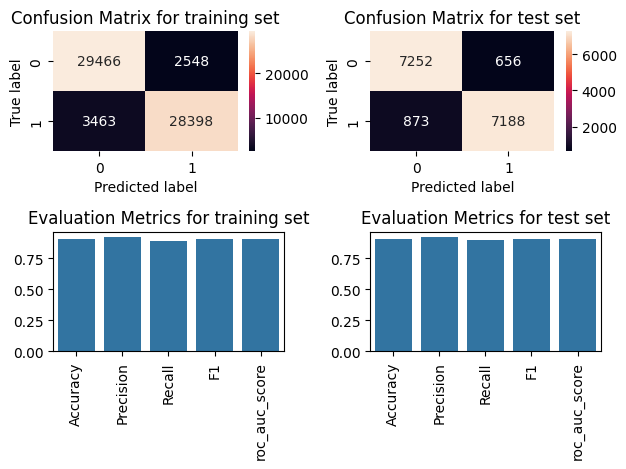

In [ ]:
# Import Logistic Regression algoritham in envirnoment
from sklearn.linear_model import LogisticRegression
# Fitting Logistic Regression model to training set
Logistic_regression=LogisticRegression(fit_intercept=True, max_iter=10000,random_state=0)
lr=classification_model(X_train, X_test, y_train, y_test, Logistic_regression)

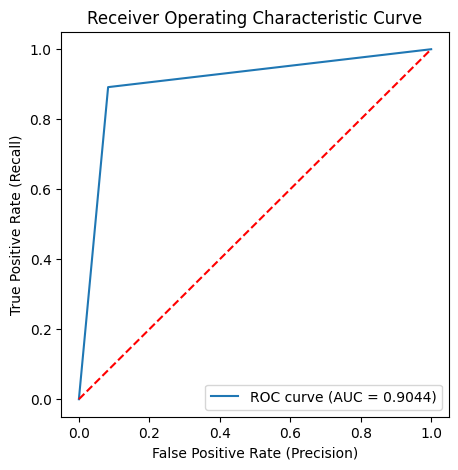

In [ ]:
# Plot roc curve for Logistic Regression classifier
y_pred=lr['y_test_pred']
plot_roc_curve(y_test, y_pred)

**Cross- Validation & Hyperparameter Tuning**

Fitting 3 folds for each of 7 candidates, totalling 21 fits
GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, random_state=0),
             n_jobs=-1, param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='accuracy', verbose=1)
Best parameters: {'C': 100}
Best score: 0.9056281861204011
Training set evaluation result :

Confusion Matrix: 
 [[29467  2547]
 [ 3469 28392]]
Accuracy:  0.9058160469667319
Precision:  0.9176767187045477
Recall:  0.8911208060010671
F1 Score:  0.904203821656051
roc_auc_score:  0.9057809315193066

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[7251  657]
 [ 871 7190]]
Accuracy:  0.9043146095560147
Precision:  0.9162737351854212
Recall:  0.8919488897159161
F1 Score:  0.9039476992708071
roc_auc_score:  0.9044342324148626


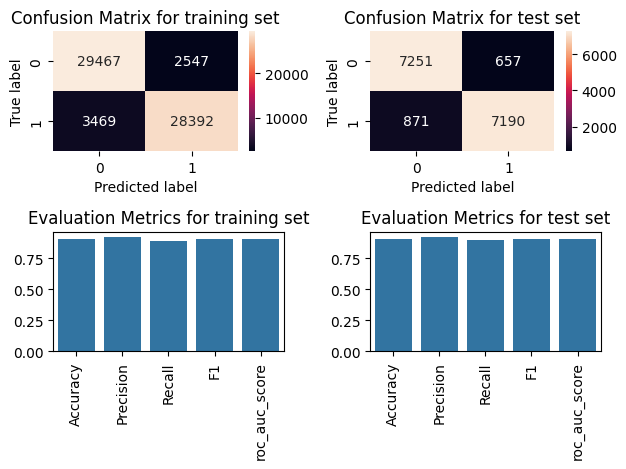

In [ ]:
## Import Logistic Regression algoritham in envirnoment
from sklearn.linear_model import LogisticRegression

## Fitting Logistic Regression model to training set using cross validation

# Defined param_dict
param_grid ={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
# Creating instance of Logistic Regression classifier
Logistic_regression=LogisticRegression(fit_intercept=True, max_iter=10000,random_state=0)
# Fitting model
lr_cv=classification_CV_model(X_train, X_test, y_train, y_test, Logistic_regression, param_grid)

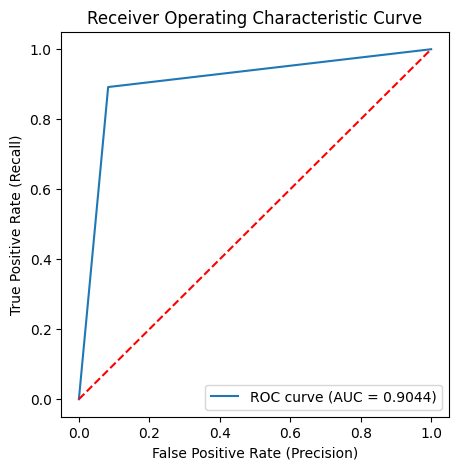

In [ ]:
# Plot roc curve for Logistic Regression for cross validation
y_pred=lr_cv['y_test_pred']
plot_roc_curve(y_test, y_pred)

**Comparing Evaluation Metrics of Train/Test Split and Cross-Validation**

+----+----------------------+--------------------+--------------------+
|    | Evaluation Metrics   |   Train/Test Split |   Cross-Validation |
+====+======================+====================+====================+
|  0 | Accuracy             |           0.904252 |           0.904315 |
+----+----------------------+--------------------+--------------------+
|  1 | Precision            |           0.916369 |           0.916274 |
+----+----------------------+--------------------+--------------------+
|  2 | Recall               |           0.891701 |           0.891949 |
+----+----------------------+--------------------+--------------------+
|  3 | F1-score             |           0.903867 |           0.903948 |
+----+----------------------+--------------------+--------------------+
|  4 | roc_auc_score        |           0.904373 |           0.904434 |
+----+----------------------+--------------------+--------------------+




<Figure size 700x700 with 0 Axes>

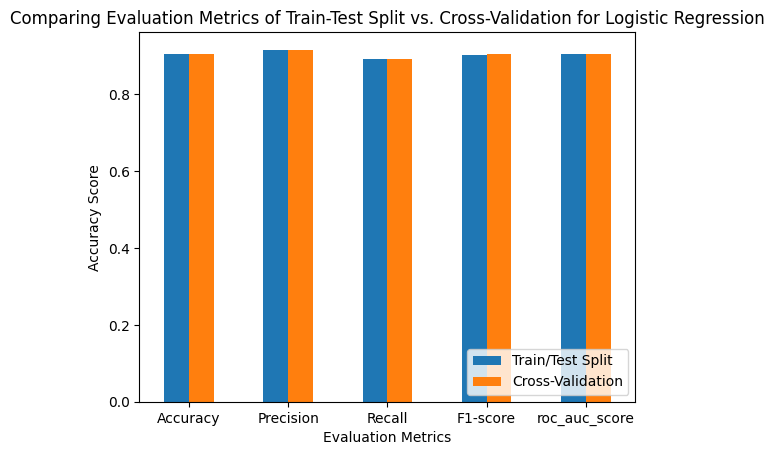

In [ ]:
# Comparing evaluation metrics of train_test_split and GridSearchCV of Logistic Regression model

import pandas as pd
import matplotlib.pyplot as plt

# Data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score','roc_auc_score']
train_test_split = [lr['accuracy_test'],lr['precision_test'],lr['recall_test'],lr['f1_test'],lr['roc_auc_score_test']]
cross_validation = [lr_cv['accuracy_test'],lr_cv['precision_test'],lr_cv['recall_test'],lr_cv['f1_test'],lr_cv['roc_auc_score_test']]

# Create a dataframe
lr_evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Train/Test Split': train_test_split,
                   'Cross-Validation': cross_validation})
# Print dataframe
print('=='*45)
print(tabulate(lr_evaluation_df, headers='keys', tablefmt='grid'))
print('\n', '=='*45, '\n')

# Create a barplot
plt.figure(figsize=(7,7))
ax=lr_evaluation_df.plot.bar(x='Evaluation Metrics', rot=0)

# Set the title and labels
ax.set_title("Comparing Evaluation Metrics of Train-Test Split vs. Cross-Validation for Logistic Regression")
ax.set_xlabel("Evaluation Metrics")
ax.set_ylabel("Accuracy Score")
ax.legend(loc="lower right")

# Show the plot
plt.show()
print('=='*45)

**Observations :**


*   We saw no improvement in the model after training with cross-validation.
*   We got 0.91  % of accuracy in logistics regression model.




#[2] Naive Bayes

GaussianNB()
Training set evaluation result :

Confusion Matrix: 
 [[28788  3226]
 [11676 20185]]
Accuracy:  0.7667005870841487
Precision:  0.8622015291956773
Recall:  0.6335331596622831
F1 Score:  0.7303878998407873
roc_auc_score:  0.7663823729216644

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[7104  804]
 [2983 5078]]
Accuracy:  0.7628530277412486
Precision:  0.8633117987079225
Recall:  0.6299466567423396
F1 Score:  0.7283941762891772
roc_auc_score:  0.7641387304956008


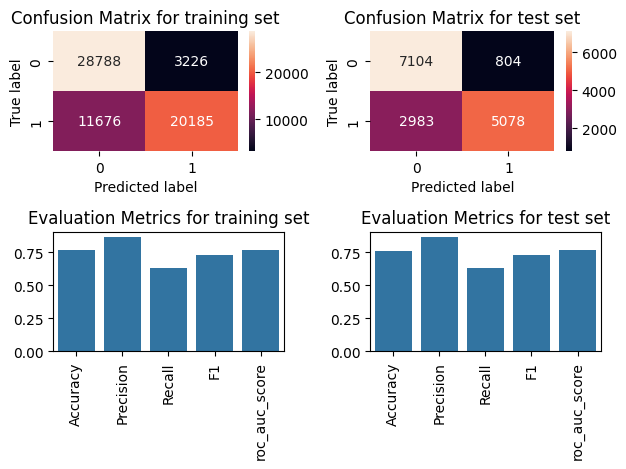

In [ ]:
# Import Naive Bayes algoritham in envirnoment
from sklearn.naive_bayes import GaussianNB
# Fitting Naive Bayes model to training set
classifier_nb = GaussianNB()
nb=classification_model(X_train, X_test, y_train, y_test, classifier_nb)

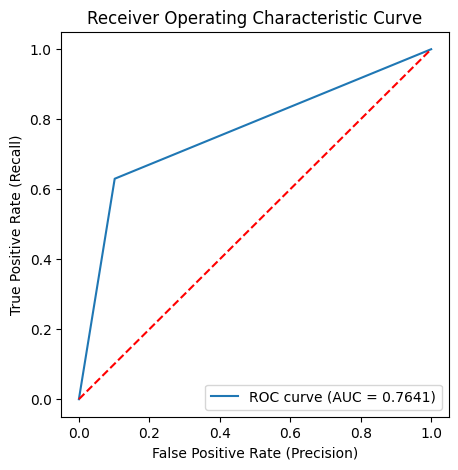

In [ ]:
# Plot ROC curve for Naive Bayes classifier
y_pred=nb['y_test_pred']
plot_roc_curve(y_test, y_pred)

**Cross- Validation & Hyperparameter Tuning**

Fitting 3 folds for each of 6 candidates, totalling 18 fits
GridSearchCV(cv=3, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'priors': [None, [0.1, 0.1]],
                         'var_smoothing': [1e-09, 1e-06, 1e-12]},
             scoring='accuracy', verbose=1)
Best parameters: {'priors': None, 'var_smoothing': 1e-09}
Best score: 0.7669041425634037
Training set evaluation result :

Confusion Matrix: 
 [[28788  3226]
 [11676 20185]]
Accuracy:  0.7667005870841487
Precision:  0.8622015291956773
Recall:  0.6335331596622831
F1 Score:  0.7303878998407873
roc_auc_score:  0.7663823729216644

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[7104  804]
 [2983 5078]]
Accuracy:  0.7628530277412486
Precision:  0.8633117987079225
Recall:  0.6299466567423396
F1 Score:  0.7283941762891772
roc_auc_score:  0.7641387304956008


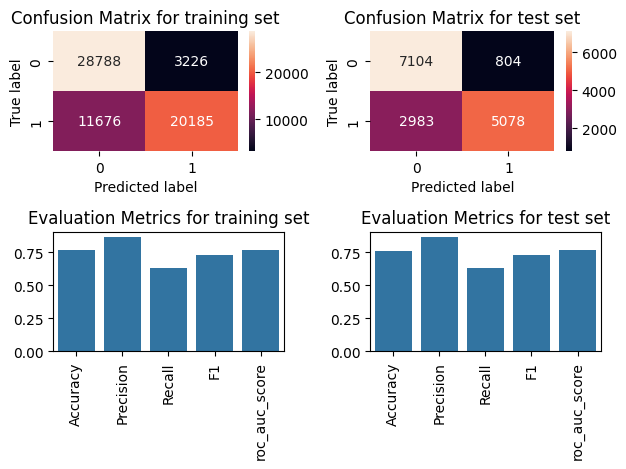

In [ ]:
# Import Naive Bayes algoritham in envirnoment
from sklearn.naive_bayes import GaussianNB

## Fitting Naive Bayes model to training set using cross validation

# Defining param_dict
n_classes = np.unique(df['Target'])
param_grid = {'priors': [None, [0.1,]* len(n_classes),],'var_smoothing': [1e-9, 1e-6, 1e-12],}
# Creating instance of Naive Bayes classifier
classifier_nb = GaussianNB()
# Fitting model
nb_cv=classification_CV_model(X_train, X_test, y_train, y_test, classifier_nb, param_grid)

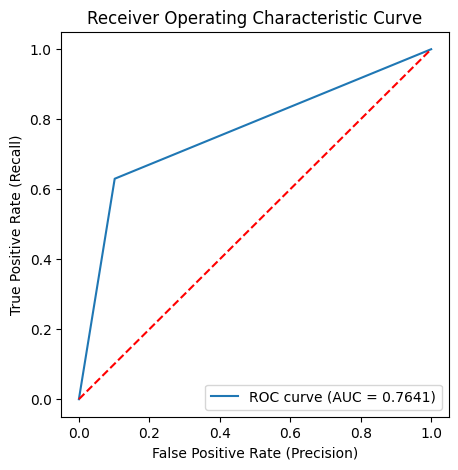

In [ ]:
# Plot ROC curve for Naive Bayes classifier
y_pred=nb_cv['y_test_pred']
plot_roc_curve(y_test, y_pred)

**Comparing Evaluation Metrics of Train/Test Split and Cross-Validation**

+----+----------------------+--------------------+--------------------+
|    | Evaluation Metrics   |   Train/Test Split |   Cross-Validation |
+====+======================+====================+====================+
|  0 | Accuracy             |           0.762853 |           0.762853 |
+----+----------------------+--------------------+--------------------+
|  1 | Precision            |           0.863312 |           0.863312 |
+----+----------------------+--------------------+--------------------+
|  2 | Recall               |           0.629947 |           0.629947 |
+----+----------------------+--------------------+--------------------+
|  3 | F1-score             |           0.728394 |           0.728394 |
+----+----------------------+--------------------+--------------------+
|  4 | roc_auc_score        |           0.764139 |           0.764139 |
+----+----------------------+--------------------+--------------------+




<Figure size 700x700 with 0 Axes>

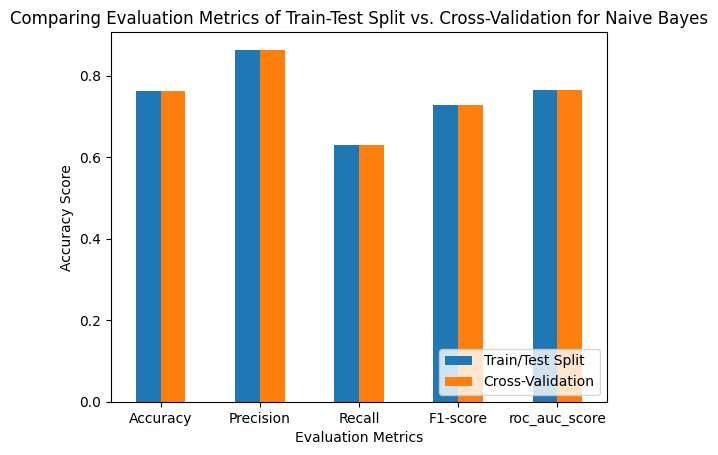

In [ ]:
# Comparing evaluation metrics of train_test_split and GridSearchCV of Naive Bayes

import pandas as pd
import matplotlib.pyplot as plt

# Data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score','roc_auc_score']
train_test_split = [nb['accuracy_test'],nb['precision_test'],nb['recall_test'],nb['f1_test'],nb['roc_auc_score_test']]
cross_validation = [nb_cv['accuracy_test'],nb_cv['precision_test'],nb_cv['recall_test'],nb_cv['f1_test'],nb_cv['roc_auc_score_test']]

# Create a dataframe
nb_evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Train/Test Split': train_test_split,
                   'Cross-Validation': cross_validation})
# Print dataframe
print('=='*45)
print(tabulate(nb_evaluation_df, headers='keys', tablefmt='grid'))
print('\n', '=='*45, '\n')

# Create a barplot
plt.figure(figsize=(7,7))
ax=nb_evaluation_df.plot.bar(x='Evaluation Metrics', rot=0)

# Set the title and labels
ax.set_title("Comparing Evaluation Metrics of Train-Test Split vs. Cross-Validation for Naive Bayes")
ax.set_xlabel("Evaluation Metrics")
ax.set_ylabel("Accuracy Score")
ax.legend(loc="lower right")

# Show the plot
plt.show()
print('=='*45)

**Observations :**



*   We not found any improvement in the model after training model using cross-validation.
*   We got 0.85 % of accuracy using train_test_split and 0.85 % of accuracy using cross validation in Naive Baye model.



#[3] Artificial Neural Networks - ANNs

In [ ]:
# Installing keras in envirnoiment
!pip install keras

In [ ]:
# Installing tensorflow in envirnoiment
!pip install tensorflow

In [ ]:
## Build Artificial Neural Network

# Importing necessary dependancy
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# Initialize the Artificial Neural Network
classifier = Sequential()

# Add the input layer and the first hidden layer
classifier.add(Dense(units = 51, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation = 'relu', input_dim = 34))

# Add the second hidden layer
classifier.add(Dense(units = 51,kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation = 'relu'))

# Add the output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compile the ANN
adam = Adam(lr=0.001)
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fit the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 20)

Epoch 1/20
6388/6388 [==============================] - 27s 4ms/step - loss: 0.2477 - accuracy: 0.9006
Epoch 2/20
6388/6388 [==============================] - 30s 5ms/step - loss: 0.2127 - accuracy: 0.9121
Epoch 3/20
6388/6388 [==============================] - 13s 2ms/step - loss: 0.2042 - accuracy: 0.9141
Epoch 4/20
6388/6388 [==============================] - 13s 2ms/step - loss: 0.2000 - accuracy: 0.9158
Epoch 5/20
6388/6388 [==============================] - 13s 2ms/step - loss: 0.1980 - accuracy: 0.9164
Epoch 6/20
6388/6388 [==============================] - 13s 2ms/step - loss: 0.1964 - accuracy: 0.9171
Epoch 7/20
6388/6388 [==============================] - 14s 2ms/step - loss: 0.1947 - accuracy: 0.9172
Epoch 8/20
6388/6388 [==============================] - 13s 2ms/step - loss: 0.1937 - accuracy: 0.9171
Epoch 9/20
6388/6388 [==============================] - 14s 2ms/step - loss: 0.1937 - accuracy: 0.9181
Epoch 10/20
6388/6388 [==============================] - 13s 2ms/step - l

500/500 [==============================] - 2s 4ms/step
__________________________________________________________________________________________
Training set evaluation result for ANN :

Confusion Matrix: 
 [[29199  2815]
 [ 2237 29624]]
Accuracy:  0.920908023483366
Precision:  0.9132217392644656
Recall:  0.9297887699695553
F1 Score:  0.9214307931570763
roc_auc_score:  0.9209292447336375

-------------------------------

Test set evaluation result for ANN :

Confusion Matrix: 
 [[7189  719]
 [ 607 7454]]
Accuracy:  0.9169641179785835
Precision:  0.9120274073167748
Recall:  0.9246991688376132
F1 Score:  0.9183195761981029
roc_auc_score:  0.9168892910450079


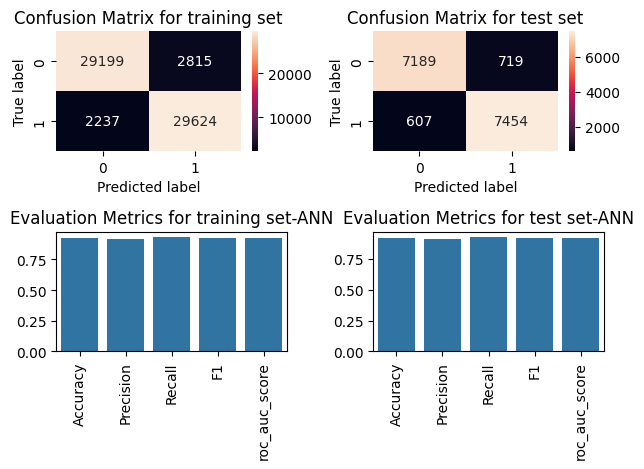

In [ ]:
## Make predictions
y_train_predict = classifier.predict(X_train)
y_train_pred = (y_train_predict > 0.5)

y_test_predict = classifier.predict(X_test)
y_test_pred = (y_test_predict > 0.5)
print('__'*45)

## Evaluate the model
print('Training set evaluation result for ANN :\n')
cm_train_ann = confusion_matrix(y_train, y_train_pred)
accuracy_train_ann = accuracy_score(y_train, y_train_pred)
precision_train_ann = precision_score(y_train, y_train_pred)
recall_train_ann = recall_score(y_train, y_train_pred)
f1_train_ann = f1_score(y_train, y_train_pred)
roc_auc_score_train_ann = roc_auc_score(y_train, y_train_pred)
print("Confusion Matrix: \n", cm_train_ann)
print("Accuracy: ", accuracy_train_ann)
print("Precision: ", precision_train_ann)
print("Recall: ", recall_train_ann)
print("F1 Score: ", f1_train_ann)
print("roc_auc_score: ", roc_auc_score_train_ann)
print('\n-------------------------------\n')
print('Test set evaluation result for ANN :\n')
cm_test_ann = confusion_matrix(y_test, y_test_pred)
accuracy_test_ann = accuracy_score(y_test, y_test_pred)
precision_test_ann = precision_score(y_test, y_test_pred)
recall_test_ann = recall_score(y_test, y_test_pred)
f1_test_ann = f1_score(y_test, y_test_pred)
roc_auc_score_test_ann=roc_auc_score(y_test, y_test_pred)
print("Confusion Matrix: \n", cm_test_ann)
print("Accuracy: ", accuracy_test_ann)
print("Precision: ", precision_test_ann)
print("Recall: ", recall_test_ann)
print("F1 Score: ", f1_test_ann)
print("roc_auc_score: ", roc_auc_score_test_ann)
print('=='*45)

## Visualizes evaluation metrics
fig,axes = plt.subplots(nrows=2, ncols=2)
ax1 = sns.heatmap(cm_train_ann, annot=True, ax=axes[0,0], fmt='d')
ax1.set_title('Confusion Matrix for training set')
ax1.set_ylabel('True label')
ax1.set_xlabel('Predicted label')
ax2 = sns.heatmap(cm_test_ann, annot=True, ax=axes[0,1], fmt='d')
ax2.set_title('Confusion Matrix for test set')
ax2.set_ylabel('True label')
ax2.set_xlabel('Predicted label')
ax3 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_train_ann, precision_train_ann, recall_train_ann, f1_train_ann, roc_auc_score_train_ann], ax=axes[1,0])
ax3.set_title('Evaluation Metrics for training set-ANN')
ax3.tick_params(axis='x', rotation=90)
ax4 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_test_ann, precision_test_ann, recall_test_ann, f1_test_ann, roc_auc_score_test_ann], ax=axes[1,1])
ax4.set_title('Evaluation Metrics for test set-ANN')
ax4.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()
print('=='*45)

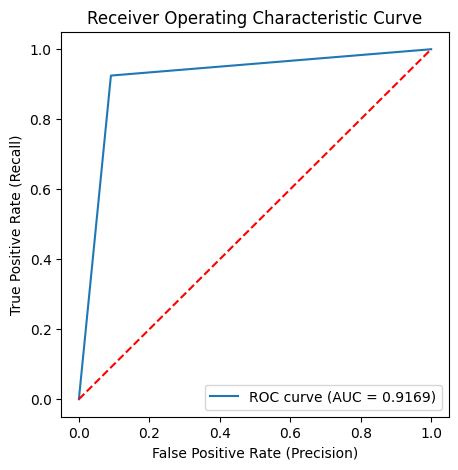

In [ ]:
# Plot ROC curve for ANN
plot_roc_curve(y_test, y_test_pred)

**Comparing Evaluation Metrics of Train/Test Split**

+----+----------------------+----------+
|    | Evaluation Metrics   |   Result |
+====+======================+==========+
|  0 | Accuracy             | 0.916964 |
+----+----------------------+----------+
|  1 | Precision            | 0.912027 |
+----+----------------------+----------+
|  2 | Recall               | 0.924699 |
+----+----------------------+----------+
|  3 | F1-score             | 0.91832  |
+----+----------------------+----------+
|  4 | roc_auc_score        | 0.916889 |
+----+----------------------+----------+




<Figure size 700x700 with 0 Axes>

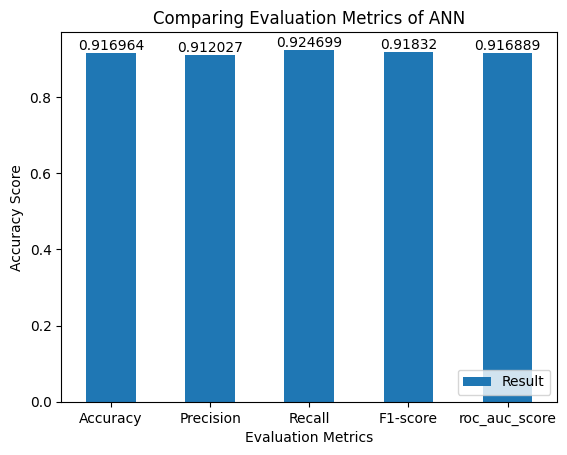

In [ ]:
# Comparing evaluation metrics of train_test_split of ANN

import pandas as pd
import matplotlib.pyplot as plt

# Data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score','roc_auc_score']
ev_result = [accuracy_test_ann, precision_test_ann, recall_test_ann, f1_test_ann, roc_auc_score_test_ann]

# Create a dataframe
ann_evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Result': ev_result})
# Print dataframe
print('=='*45)
print(tabulate(ann_evaluation_df, headers='keys', tablefmt='grid'))
print('\n', '=='*45, '\n')

# Create a barplot
plt.figure(figsize=(7,7))
ax=ann_evaluation_df.plot.bar(x='Evaluation Metrics', rot=0)

# Set the title and labels
ax.set_title("Comparing Evaluation Metrics of ANN")
ax.set_xlabel("Evaluation Metrics")
ax.set_ylabel("Accuracy Score")
ax.bar_label(ax.containers[0])
ax.legend(loc="lower right")

# Show the plot
plt.show()

print('=='*45)

**Observations :**



* We got 0.91 % accuracy and 0.91 F1-score in Artificial Neural Networks.




# **Comparing Different Models based on the Evaluation Metrics**

In [ ]:
## Creating dataframe of performance of all models

# Data
model=['Logistic_Regression','Naive_Bayes','ANN']
Accuracy=[lr_cv['accuracy_test'], nb_cv['accuracy_test'], accuracy_test_ann]
Precision=[lr_cv['precision_test'],nb_cv['precision_test'], precision_test_ann]
Recall=[lr_cv['recall_test'], nb_cv['recall_test'], recall_test_ann]
F1_score=[lr_cv['f1_test'], nb_cv['f1_test'], f1_test_ann]
roc_auc_score=[lr_cv['roc_auc_score_test'],nb_cv['roc_auc_score_test'], roc_auc_score_test_ann]
confusion_matrix=[lr_cv['cm_test'],nb_cv['cm_test'], cm_test_ann]

# Create a dataframe
models_evaluation_df = pd.DataFrame({'model': model, 'Accuracy': Accuracy, 'Precision': Precision,'Recall':Recall, 'F1_score':F1_score,'roc_auc_score':roc_auc_score, 'confusion matrix':confusion_matrix})
# Dataframe
models_evaluation_df

model  Accuracy  Precision    Recall  F1_score  \
0  Logistic_Regression  0.904315   0.916274  0.891949  0.903948   
1          Naive_Bayes  0.762853   0.863312  0.629947  0.728394   
2                  ANN  0.916964   0.912027  0.924699  0.918320   

   roc_auc_score             confusion matrix  
0       0.904434   [[7251, 657], [871, 7190]]  
1       0.764139  [[7104, 804], [2983, 5078]]  
2       0.916889   [[7189, 719], [607, 7454]]

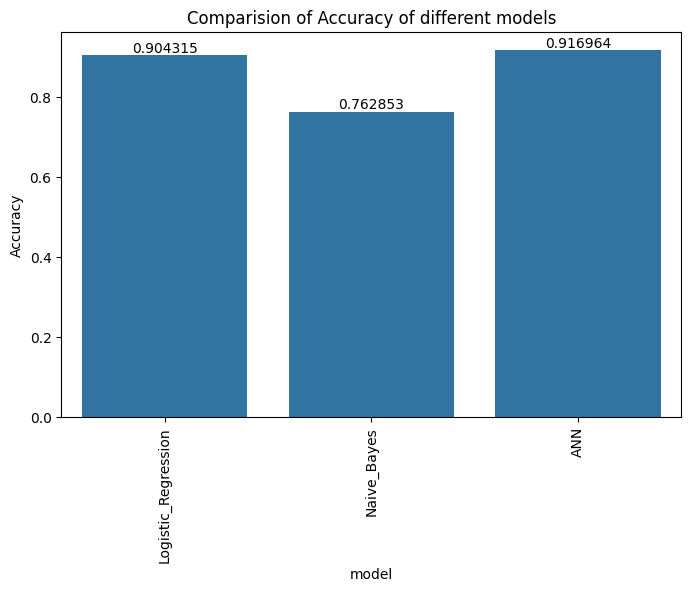

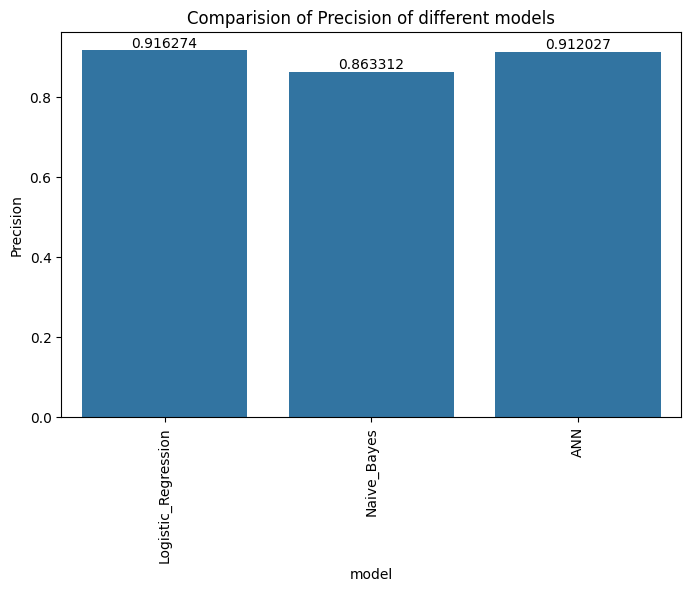

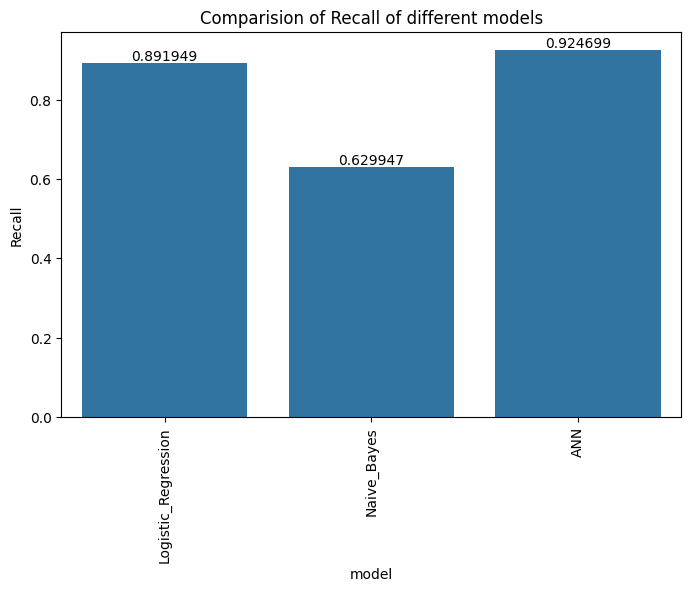

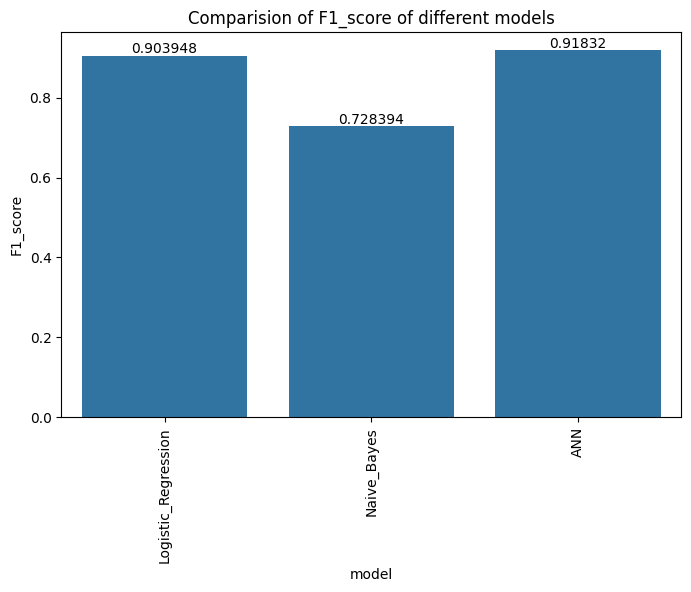

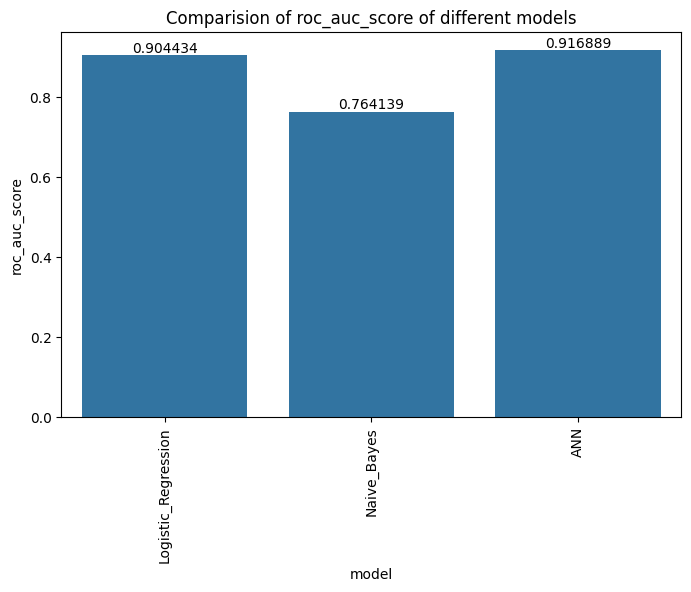

In [ ]:
## Plotting bar plot to compare each evaluation metric for different models

# Defining target
col=[var for var in models_evaluation_df.columns if var not in ['model','confusion matrix']]

for var in col:
    plt.figure(figsize=(8,5))
    ax=sns.barplot(x=models_evaluation_df['model'], y=models_evaluation_df[var])
    ax.set_title(f'Comparision of {var} of different models')
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=90)
    plt.show()

# **Model Explainability and Feature Importance**

**Feature Importance**

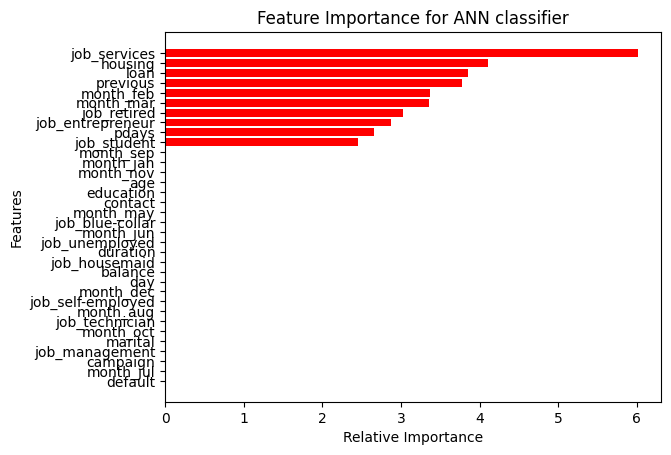

In [ ]:
# Feature Importance for ANN classifier

# Assuming 'classifier' is your trained ANN model

# Get weights for the input layer
weights = classifier.layers[0].get_weights()[0]

# Calculate feature importance as the sum of absolute weights
importances = np.sum(np.abs(weights), axis=0)
indices = np.argsort(importances)

# Ensure indices are within the valid range of 'features'
valid_indices = indices[indices < len(features)]  # Filter indices to be within the valid range

# Plot the graph for important feature
plt.title('Feature Importance for ANN classifier')
plt.barh(range(len(valid_indices)), importances[valid_indices], color='red', align='center')
plt.yticks(range(len(valid_indices)), [features[i] for i in valid_indices])  # Use valid_indices here
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()